In [1]:
!pip install torch torchvision numpy pandas scikit-learn matplotlib tqdm pillow pyhealth

# Data Files
Get the `Data_Entry_2017_v2020.csv` file from the Box folder (https://nihcc.app.box.com/v/ChestXray-NIHCC)

In [2]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import os
import torchvision.transforms as transforms
from pyhealth.models import BaseModel
from pyhealth.trainer import Trainer
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

/opt/conda/lib/python3.12/site-packages/pyhealth/tasks/cardiology_detect.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
/opt/conda/lib/python3.12/site-packages/pyhealth/trainer.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange


In [ ]:

 #!/usr/bin/env python3
# Create directories
!mkdir -p ~/data/images CXR8/images

# # Download all 12 files
!wget -P ~/data/images/ https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz
!mv ~/data/images/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz ~/data/images/images_001.tar.gz
!wget -P ~/data/images/ https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz
!mv ~/data/images/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz ~/data/images/images_002.tar.gz
!wget -P ~/data/images/ https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz
!mv ~/data/images/f1t00wrtdk94satdfb9olcolqx20z2jp.gz ~/data/images/images_003.tar.gz
!wget -P ~/data/images/ https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz
!mv ~/data/images/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz ~/data/images/images_004.tar.gz
!wget -P ~/data/images/ https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz
!mv ~/data/images/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz ~/data/images/images_005.tar.gz
!wget -P ~/data/images/ https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz
!mv ~/data/images/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz ~/data/images/images_006.tar.gz
!wget -P ~/data/images/ https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz
!mv ~/data/images/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz ~/data/images/images_007.tar.gz
!wget -P ~/data/images/ https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz
!mv ~/data/images/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz ~/data/images/images_008.tar.gz
!wget -P ~/data/images/ https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz
!mv ~/data/images/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz ~/data/images/images_009.tar.gz
!wget -P ~/data/images/ https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz
!mv ~/data/images/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz ~/data/images/images_010.tar.gz
!wget -P ~/data/images/ https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz
!mv ~/data/images/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz ~/data/images/images_011.tar.gz
!wget -P ~/data/images/ https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz
!mv ~/data/images/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz ~/data/images/images_012.tar.gz

# # Extract all files
!tar -xzf ~/data/images/images_001.tar.gz -C CXR8/images --strip-components=1
!tar -xzf ~/data/images/images_002.tar.gz -C CXR8/images --strip-components=1
!tar -xzf ~/data/images/images_003.tar.gz -C CXR8/images --strip-components=1
!tar -xzf ~/data/images/images_004.tar.gz -C CXR8/images --strip-components=1
!tar -xzf ~/data/images/images_005.tar.gz -C CXR8/images --strip-components=1
!tar -xzf ~/data/images/images_006.tar.gz -C CXR8/images --strip-components=1
!tar -xzf ~/data/images/images_007.tar.gz -C CXR8/images --strip-components=1
!tar -xzf ~/data/images/images_008.tar.gz -C CXR8/images --strip-components=1
!tar -xzf ~/data/images/images_009.tar.gz -C CXR8/images --strip-components=1
!tar -xzf ~/data/images/images_010.tar.gz -C CXR8/images --strip-components=1
!tar -xzf ~/data/images/images_011.tar.gz -C CXR8/images --strip-components=1
!tar -xzf ~/data/images/images_012.tar.gz -C CXR8/images --strip-components=1

# Check total images
!find CXR8/images -name "*.png" | wc -l

--2025-12-05 06:40:24--  https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz
Resolving nihcc.box.com (nihcc.box.com)... 74.112.186.157, 2620:117:bff0:12d::
Connecting to nihcc.box.com (nihcc.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /public/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz [following]
--2025-12-05 06:40:24--  https://nihcc.box.com/public/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz
Reusing existing connection to nihcc.box.com:443.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://nihcc.app.box.com/public/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz [following]
--2025-12-05 06:40:24--  https://nihcc.app.box.com/public/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz
Resolving nihcc.app.box.com (nihcc.app.box.com)... 74.112.186.157, 2620:117:bff0:12d::
Connecting to nihcc.app.box.com (nihcc.app.box.com)|74.112.186.157|:443... connected.
HTTP request sent, awaiting re

UnboundLocalError: cannot access local variable 'child' where it is not associated with a value

CHEST X-RAY AGE PREDICTION TRAINING

Loading training dataset...

Dataset loaded: 78460 samples (skipped 8)
Age range: [1, 95], Mean: 46.5

Loading validation dataset...

Dataset loaded: 11218 samples (skipped 1)
Age range: [1, 93], Mean: 46.8

Loading test dataset...

Dataset loaded: 22428 samples (skipped 5)
Age range: [1, 93], Mean: 47.0

Using device: cuda


Using cache found in /home/sagemaker-user/.cache/torch/hub/pytorch_vision_main



Model created with 3,539,461 trainable parameters

STARTING TRAINING


/opt/conda/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch  1, Batch    0/1226, Loss: 44.3954, Age: 44.0049, Group: 1.3015
Epoch  1, Batch   50/1226, Loss: 44.3997, Age: 44.0774, Group: 1.0742
Epoch  1, Batch  100/1226, Loss: 42.8897, Age: 42.6079, Group: 0.9393
Epoch  1, Batch  150/1226, Loss: 36.4720, Age: 36.1864, Group: 0.9520
Epoch  1, Batch  200/1226, Loss: 33.6582, Age: 33.3775, Group: 0.9358
Epoch  1, Batch  250/1226, Loss: 27.1364, Age: 26.8467, Group: 0.9657
Epoch  1, Batch  300/1226, Loss: 24.0682, Age: 23.8012, Group: 0.8902
Epoch  1, Batch  350/1226, Loss: 18.6736, Age: 18.3748, Group: 0.9960
Epoch  1, Batch  400/1226, Loss: 18.3752, Age: 18.1002, Group: 0.9166
Epoch  1, Batch  450/1226, Loss: 13.0966, Age: 12.8143, Group: 0.9409
Epoch  1, Batch  500/1226, Loss: 10.1251, Age: 9.8405, Group: 0.9485
Epoch  1, Batch  550/1226, Loss: 8.5400, Age: 8.2831, Group: 0.8564
Epoch  1, Batch  600/1226, Loss: 7.0390, Age: 6.8304, Group: 0.6956
Epoch  1, Batch  650/1226, Loss: 8.6586, Age: 8.4220, Group: 0.7886
Epoch  1, Batch  700/1226, 

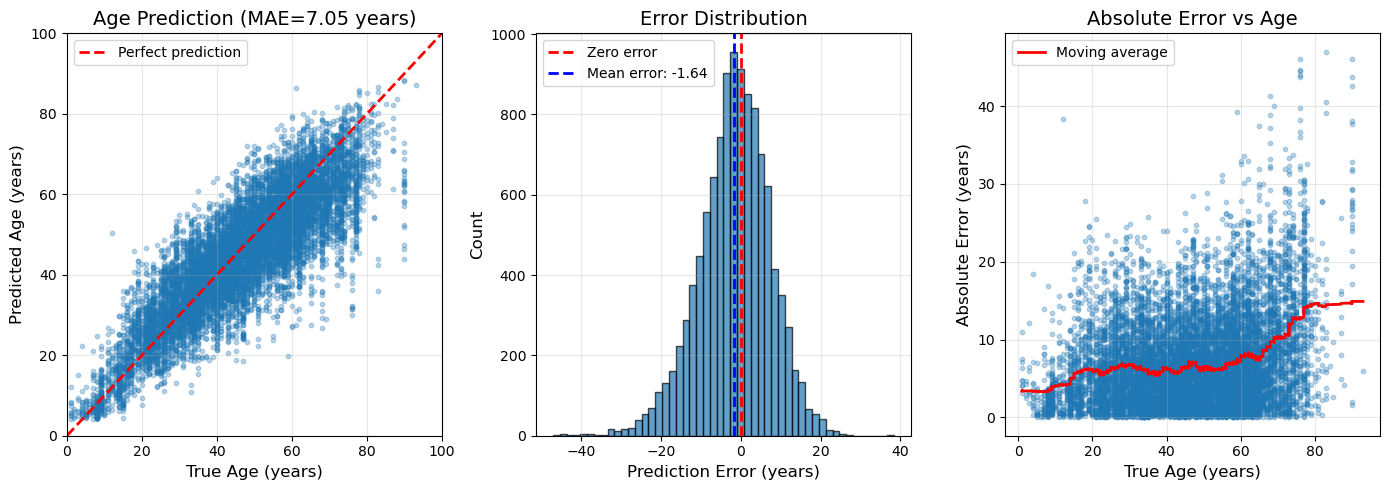


✓ New best model saved! MAE: 7.05 years

----------------------------------------------------------------------
Epoch  2, Batch    0/1226, Loss: 8.5120, Age: 8.3200, Group: 0.6399
Epoch  2, Batch   50/1226, Loss: 7.1251, Age: 6.9374, Group: 0.6255
Epoch  2, Batch  100/1226, Loss: 7.0857, Age: 6.9024, Group: 0.6110
Epoch  2, Batch  150/1226, Loss: 6.5656, Age: 6.4024, Group: 0.5441
Epoch  2, Batch  200/1226, Loss: 5.9454, Age: 5.7741, Group: 0.5710
Epoch  2, Batch  250/1226, Loss: 7.4024, Age: 7.2129, Group: 0.6319
Epoch  2, Batch  300/1226, Loss: 9.6283, Age: 9.4453, Group: 0.6100
Epoch  2, Batch  350/1226, Loss: 8.8450, Age: 8.6754, Group: 0.5652
Epoch  2, Batch  400/1226, Loss: 6.7956, Age: 6.6124, Group: 0.6109
Epoch  2, Batch  450/1226, Loss: 6.3369, Age: 6.1422, Group: 0.6488
Epoch  2, Batch  500/1226, Loss: 7.4131, Age: 7.2347, Group: 0.5946
Epoch  2, Batch  550/1226, Loss: 6.7323, Age: 6.5319, Group: 0.6680
Epoch  2, Batch  600/1226, Loss: 6.9411, Age: 6.7583, Group: 0.6095
Epo

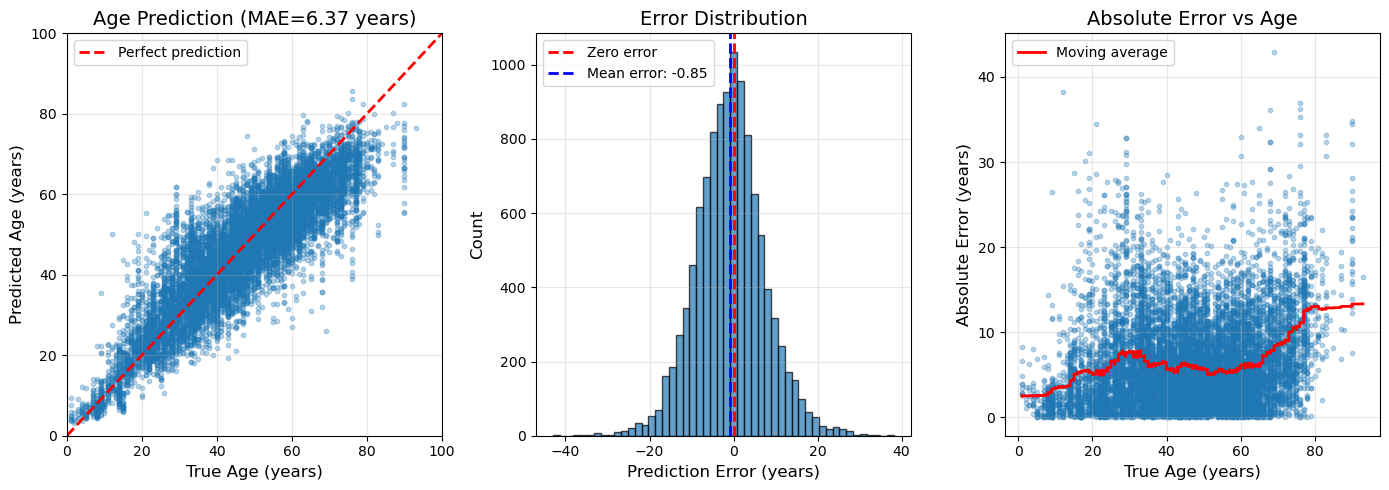


✓ New best model saved! MAE: 6.37 years

----------------------------------------------------------------------
Epoch  3, Batch    0/1226, Loss: 6.8954, Age: 6.7277, Group: 0.5589
Epoch  3, Batch   50/1226, Loss: 8.2226, Age: 8.0248, Group: 0.6595
Epoch  3, Batch  100/1226, Loss: 8.0602, Age: 7.8907, Group: 0.5651
Epoch  3, Batch  150/1226, Loss: 9.4229, Age: 9.2205, Group: 0.6749
Epoch  3, Batch  200/1226, Loss: 7.7597, Age: 7.5365, Group: 0.7440
Epoch  3, Batch  250/1226, Loss: 6.5657, Age: 6.4210, Group: 0.4824
Epoch  3, Batch  300/1226, Loss: 6.2383, Age: 6.1203, Group: 0.3936
Epoch  3, Batch  350/1226, Loss: 7.2023, Age: 7.0216, Group: 0.6024
Epoch  3, Batch  400/1226, Loss: 7.7396, Age: 7.5694, Group: 0.5672
Epoch  3, Batch  450/1226, Loss: 7.3500, Age: 7.1617, Group: 0.6276
Epoch  3, Batch  500/1226, Loss: 7.3841, Age: 7.2294, Group: 0.5158
Epoch  3, Batch  550/1226, Loss: 6.6798, Age: 6.5159, Group: 0.5461
Epoch  3, Batch  600/1226, Loss: 7.0089, Age: 6.8636, Group: 0.4843
Epo

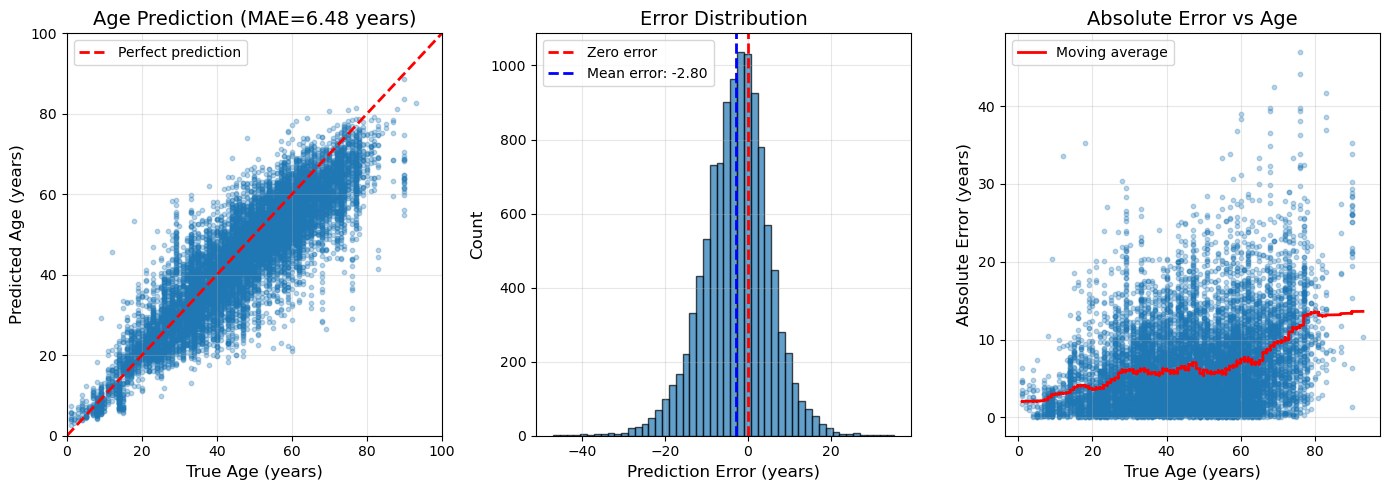


No improvement (1/7)

----------------------------------------------------------------------
Epoch  4, Batch    0/1226, Loss: 7.7522, Age: 7.5549, Group: 0.6576
Epoch  4, Batch   50/1226, Loss: 8.1193, Age: 7.9233, Group: 0.6534
Epoch  4, Batch  100/1226, Loss: 6.4479, Age: 6.2858, Group: 0.5403
Epoch  4, Batch  150/1226, Loss: 6.7290, Age: 6.5676, Group: 0.5378
Epoch  4, Batch  200/1226, Loss: 6.1598, Age: 5.9981, Group: 0.5392
Epoch  4, Batch  250/1226, Loss: 5.4762, Age: 5.3547, Group: 0.4050
Epoch  4, Batch  300/1226, Loss: 6.2227, Age: 6.0368, Group: 0.6198
Epoch  4, Batch  350/1226, Loss: 8.1887, Age: 7.9909, Group: 0.6594
Epoch  4, Batch  400/1226, Loss: 7.6158, Age: 7.4414, Group: 0.5814
Epoch  4, Batch  450/1226, Loss: 7.3970, Age: 7.2048, Group: 0.6407
Epoch  4, Batch  500/1226, Loss: 8.8811, Age: 8.6620, Group: 0.7301
Epoch  4, Batch  550/1226, Loss: 5.1426, Age: 5.0070, Group: 0.4522
Epoch  4, Batch  600/1226, Loss: 5.3586, Age: 5.2160, Group: 0.4753
Epoch  4, Batch  650/1

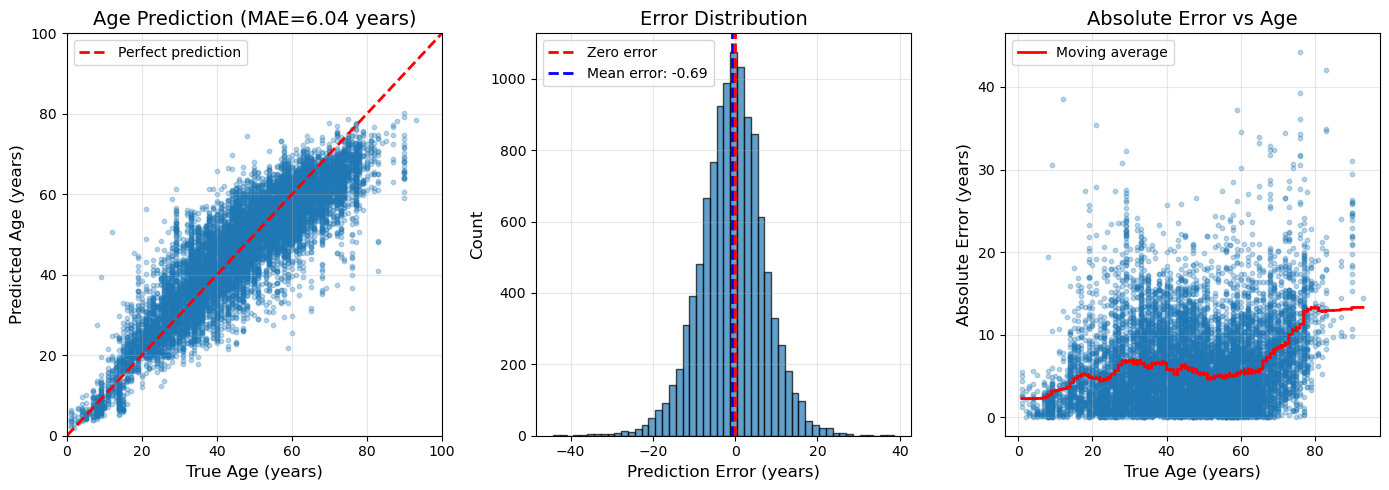


✓ New best model saved! MAE: 6.04 years

----------------------------------------------------------------------
Epoch  5, Batch    0/1226, Loss: 6.8257, Age: 6.6523, Group: 0.5783
Epoch  5, Batch   50/1226, Loss: 5.9797, Age: 5.8051, Group: 0.5822
Epoch  5, Batch  100/1226, Loss: 7.1714, Age: 7.0074, Group: 0.5466
Epoch  5, Batch  150/1226, Loss: 6.1229, Age: 5.9518, Group: 0.5704
Epoch  5, Batch  200/1226, Loss: 7.6781, Age: 7.4701, Group: 0.6934
Epoch  5, Batch  250/1226, Loss: 5.9772, Age: 5.8388, Group: 0.4614
Epoch  5, Batch  300/1226, Loss: 5.7563, Age: 5.5962, Group: 0.5334
Epoch  5, Batch  350/1226, Loss: 7.4463, Age: 7.2484, Group: 0.6595
Epoch  5, Batch  400/1226, Loss: 6.8663, Age: 6.7288, Group: 0.4585
Epoch  5, Batch  450/1226, Loss: 7.4754, Age: 7.3042, Group: 0.5705
Epoch  5, Batch  500/1226, Loss: 5.8823, Age: 5.7307, Group: 0.5052
Epoch  5, Batch  550/1226, Loss: 6.4631, Age: 6.3147, Group: 0.4945
Epoch  5, Batch  600/1226, Loss: 7.0803, Age: 6.8903, Group: 0.6332
Epo

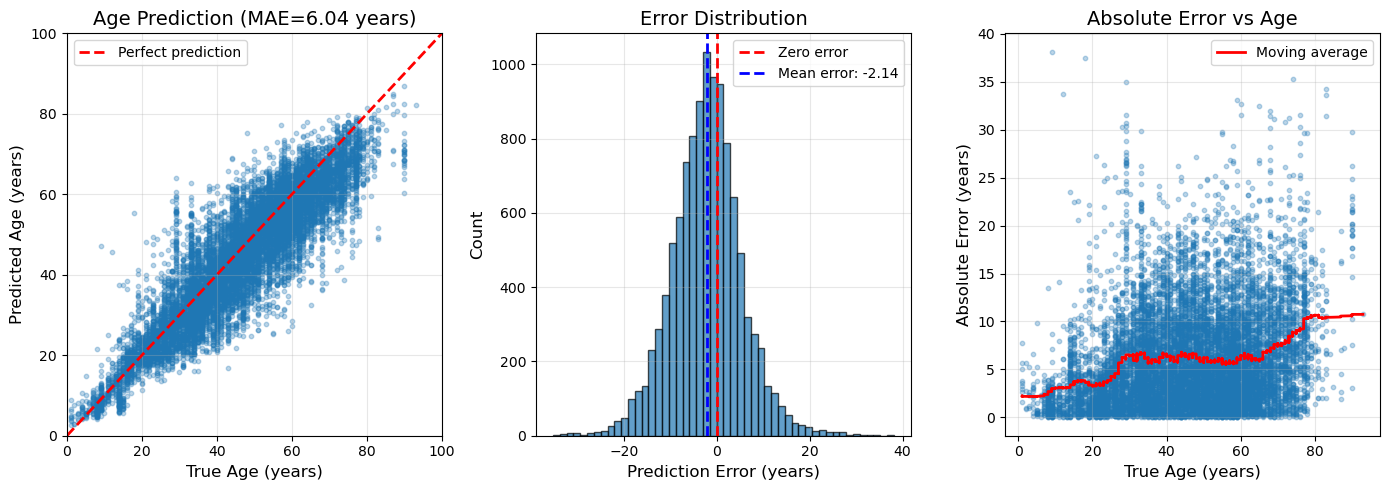


No improvement (1/7)

----------------------------------------------------------------------
Epoch  6, Batch    0/1226, Loss: 6.5688, Age: 6.3850, Group: 0.6127
Epoch  6, Batch   50/1226, Loss: 5.3969, Age: 5.2306, Group: 0.5540
Epoch  6, Batch  100/1226, Loss: 5.5489, Age: 5.4260, Group: 0.4100
Epoch  6, Batch  150/1226, Loss: 6.1447, Age: 5.9974, Group: 0.4910
Epoch  6, Batch  200/1226, Loss: 6.6754, Age: 6.5456, Group: 0.4328
Epoch  6, Batch  250/1226, Loss: 6.5037, Age: 6.3396, Group: 0.5470
Epoch  6, Batch  300/1226, Loss: 7.8747, Age: 7.6786, Group: 0.6535
Epoch  6, Batch  350/1226, Loss: 6.2854, Age: 6.1311, Group: 0.5143
Epoch  6, Batch  400/1226, Loss: 6.8037, Age: 6.6525, Group: 0.5041
Epoch  6, Batch  450/1226, Loss: 5.2468, Age: 5.1409, Group: 0.3531
Epoch  6, Batch  500/1226, Loss: 6.0815, Age: 5.9189, Group: 0.5420
Epoch  6, Batch  550/1226, Loss: 5.8972, Age: 5.7723, Group: 0.4165
Epoch  6, Batch  600/1226, Loss: 6.5880, Age: 6.4440, Group: 0.4800
Epoch  6, Batch  650/1

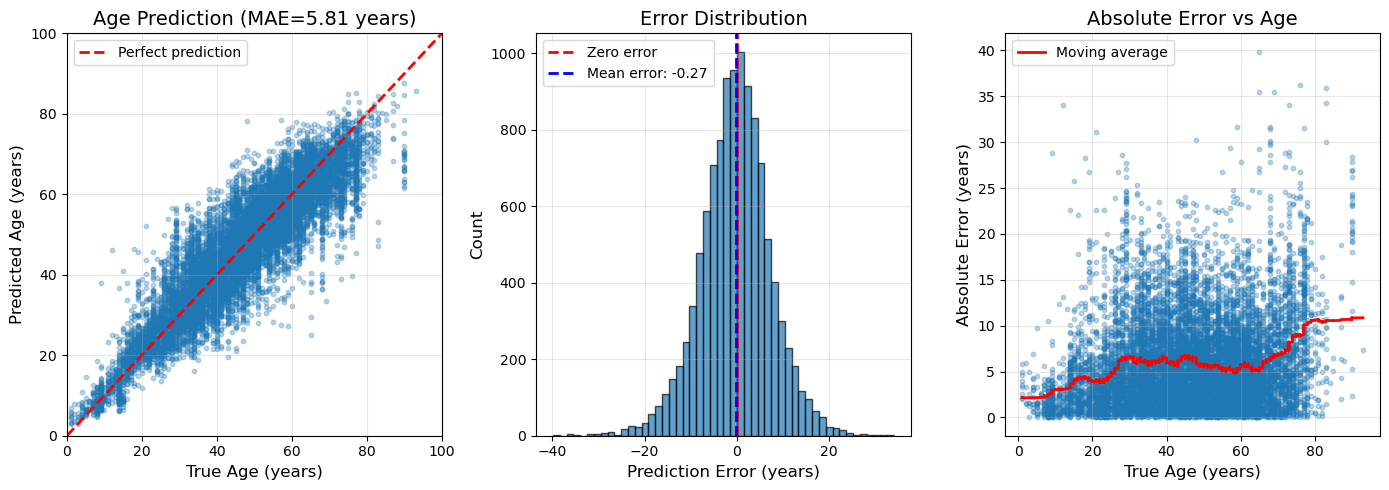


✓ New best model saved! MAE: 5.81 years

----------------------------------------------------------------------
Epoch  7, Batch    0/1226, Loss: 5.8356, Age: 5.7023, Group: 0.4445
Epoch  7, Batch   50/1226, Loss: 5.8836, Age: 5.7197, Group: 0.5462
Epoch  7, Batch  100/1226, Loss: 6.3088, Age: 6.1523, Group: 0.5215
Epoch  7, Batch  150/1226, Loss: 5.7151, Age: 5.5578, Group: 0.5241
Epoch  7, Batch  200/1226, Loss: 6.6133, Age: 6.4547, Group: 0.5285
Epoch  7, Batch  250/1226, Loss: 5.2217, Age: 5.1044, Group: 0.3910
Epoch  7, Batch  300/1226, Loss: 6.1129, Age: 5.9701, Group: 0.4759
Epoch  7, Batch  350/1226, Loss: 6.2960, Age: 6.1565, Group: 0.4648
Epoch  7, Batch  400/1226, Loss: 5.8347, Age: 5.7154, Group: 0.3976
Epoch  7, Batch  450/1226, Loss: 5.4362, Age: 5.3035, Group: 0.4425
Epoch  7, Batch  500/1226, Loss: 6.1694, Age: 6.0000, Group: 0.5647
Epoch  7, Batch  550/1226, Loss: 5.6868, Age: 5.5500, Group: 0.4560
Epoch  7, Batch  600/1226, Loss: 5.4375, Age: 5.2866, Group: 0.5029
Epo

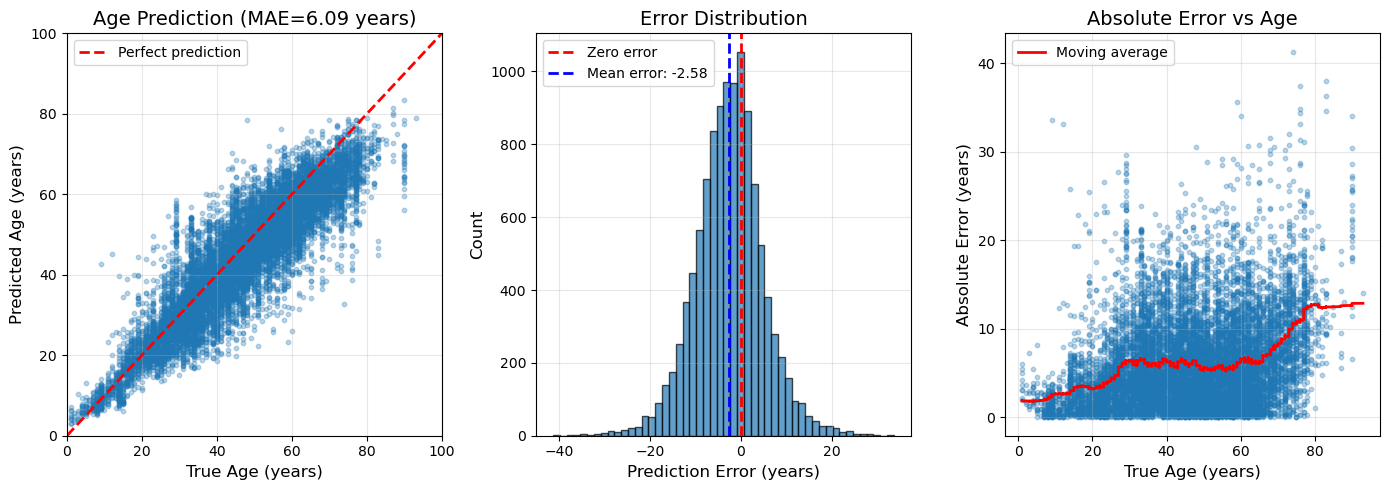


No improvement (1/7)

----------------------------------------------------------------------
Epoch  8, Batch    0/1226, Loss: 5.7158, Age: 5.5443, Group: 0.5715
Epoch  8, Batch   50/1226, Loss: 6.3015, Age: 6.1568, Group: 0.4824
Epoch  8, Batch  100/1226, Loss: 5.0030, Age: 4.8830, Group: 0.4000
Epoch  8, Batch  150/1226, Loss: 5.4619, Age: 5.3341, Group: 0.4262
Epoch  8, Batch  200/1226, Loss: 6.6303, Age: 6.4991, Group: 0.4372
Epoch  8, Batch  250/1226, Loss: 5.7465, Age: 5.6209, Group: 0.4188
Epoch  8, Batch  300/1226, Loss: 5.6172, Age: 5.5003, Group: 0.3897
Epoch  8, Batch  350/1226, Loss: 5.8526, Age: 5.7350, Group: 0.3919
Epoch  8, Batch  400/1226, Loss: 6.6882, Age: 6.4855, Group: 0.6756
Epoch  8, Batch  450/1226, Loss: 7.3852, Age: 7.2241, Group: 0.5371
Epoch  8, Batch  500/1226, Loss: 5.7349, Age: 5.5754, Group: 0.5317
Epoch  8, Batch  550/1226, Loss: 6.1728, Age: 6.0155, Group: 0.5244
Epoch  8, Batch  600/1226, Loss: 6.2399, Age: 6.1071, Group: 0.4426
Epoch  8, Batch  650/1

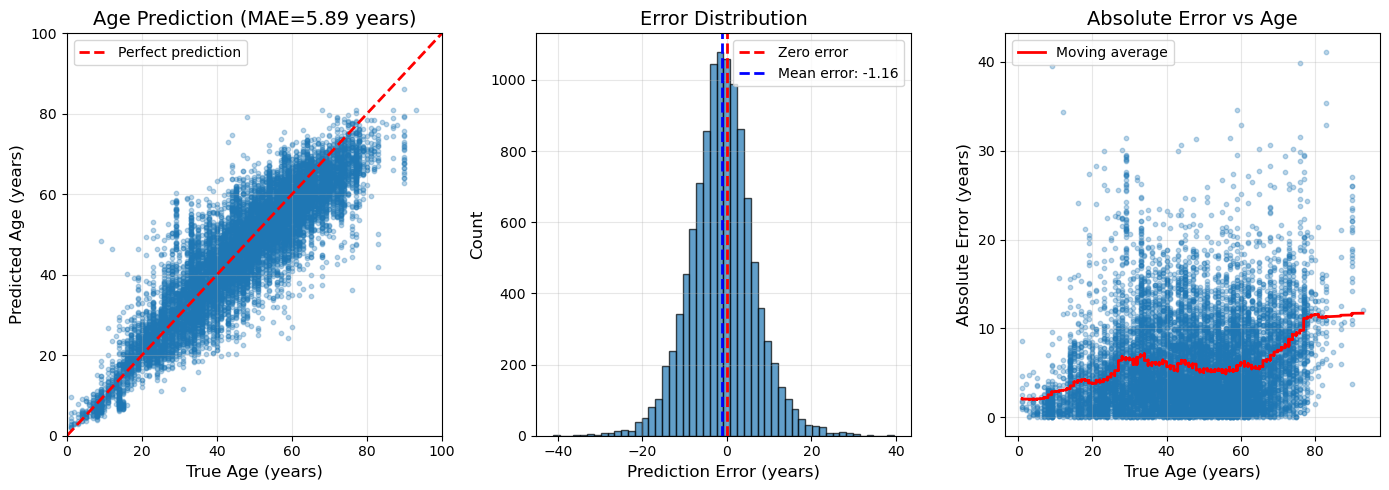


No improvement (2/7)

----------------------------------------------------------------------
Epoch  9, Batch    0/1226, Loss: 6.4306, Age: 6.2594, Group: 0.5705
Epoch  9, Batch   50/1226, Loss: 5.4246, Age: 5.3270, Group: 0.3252
Epoch  9, Batch  100/1226, Loss: 5.7867, Age: 5.6815, Group: 0.3506
Epoch  9, Batch  150/1226, Loss: 4.5808, Age: 4.4595, Group: 0.4046
Epoch  9, Batch  200/1226, Loss: 5.2950, Age: 5.1828, Group: 0.3740
Epoch  9, Batch  250/1226, Loss: 6.2417, Age: 6.0706, Group: 0.5703
Epoch  9, Batch  300/1226, Loss: 6.9294, Age: 6.7724, Group: 0.5233
Epoch  9, Batch  350/1226, Loss: 6.5304, Age: 6.3776, Group: 0.5093
Epoch  9, Batch  400/1226, Loss: 5.8490, Age: 5.6971, Group: 0.5062
Epoch  9, Batch  450/1226, Loss: 6.0934, Age: 5.9492, Group: 0.4808
Epoch  9, Batch  500/1226, Loss: 6.4802, Age: 6.3390, Group: 0.4705
Epoch  9, Batch  550/1226, Loss: 6.5777, Age: 6.4357, Group: 0.4732
Epoch  9, Batch  600/1226, Loss: 5.5464, Age: 5.4198, Group: 0.4220
Epoch  9, Batch  650/1

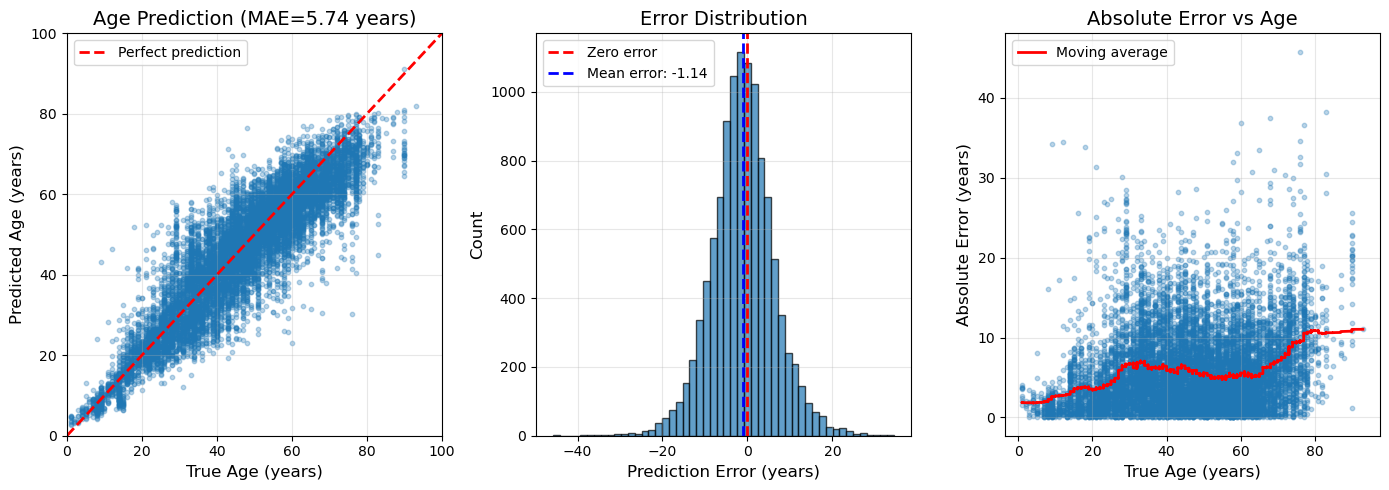


✓ New best model saved! MAE: 5.74 years

----------------------------------------------------------------------
Epoch 10, Batch    0/1226, Loss: 5.7088, Age: 5.5963, Group: 0.3752
Epoch 10, Batch   50/1226, Loss: 6.2307, Age: 6.0865, Group: 0.4807
Epoch 10, Batch  100/1226, Loss: 5.4671, Age: 5.3369, Group: 0.4340
Epoch 10, Batch  150/1226, Loss: 6.1377, Age: 5.9567, Group: 0.6033
Epoch 10, Batch  200/1226, Loss: 4.9247, Age: 4.8223, Group: 0.3415
Epoch 10, Batch  250/1226, Loss: 7.2195, Age: 7.0292, Group: 0.6342
Epoch 10, Batch  300/1226, Loss: 5.5069, Age: 5.3751, Group: 0.4395
Epoch 10, Batch  350/1226, Loss: 5.2147, Age: 5.0634, Group: 0.5043
Epoch 10, Batch  400/1226, Loss: 6.1177, Age: 5.9582, Group: 0.5317
Epoch 10, Batch  450/1226, Loss: 6.9893, Age: 6.8481, Group: 0.4707
Epoch 10, Batch  500/1226, Loss: 4.7371, Age: 4.6156, Group: 0.4051
Epoch 10, Batch  550/1226, Loss: 6.1713, Age: 6.0006, Group: 0.5691
Epoch 10, Batch  600/1226, Loss: 5.6920, Age: 5.5451, Group: 0.4897
Epo

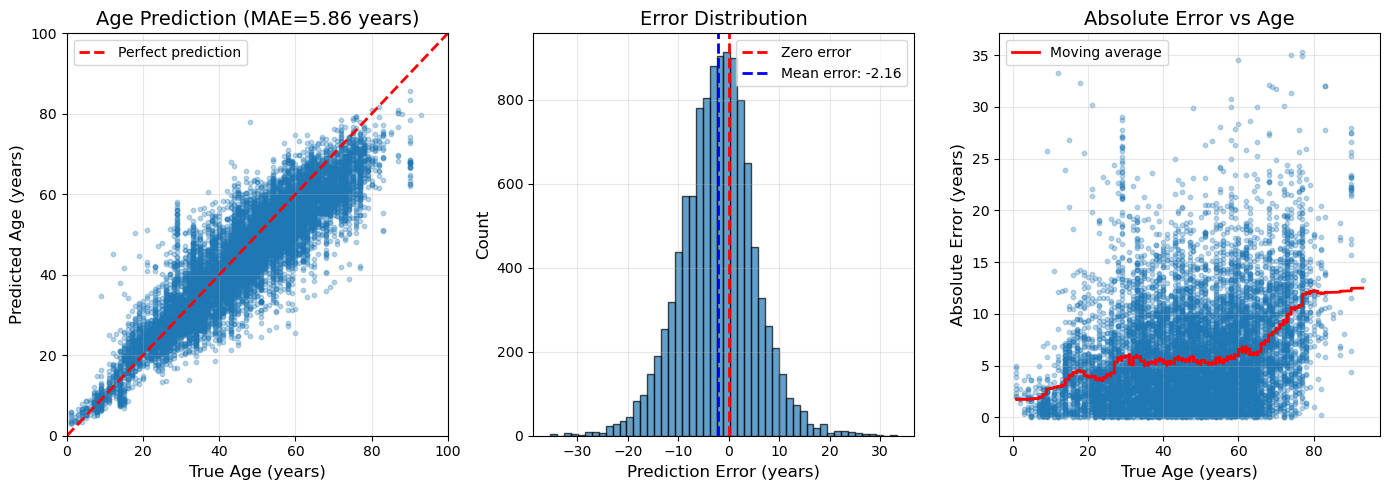


No improvement (1/7)

----------------------------------------------------------------------
Epoch 11, Batch    0/1226, Loss: 5.9633, Age: 5.8162, Group: 0.4905
Epoch 11, Batch   50/1226, Loss: 5.9843, Age: 5.8380, Group: 0.4875
Epoch 11, Batch  100/1226, Loss: 6.1553, Age: 6.0159, Group: 0.4649
Epoch 11, Batch  150/1226, Loss: 4.9901, Age: 4.8323, Group: 0.5262
Epoch 11, Batch  200/1226, Loss: 5.7351, Age: 5.5447, Group: 0.6346
Epoch 11, Batch  250/1226, Loss: 5.3692, Age: 5.2459, Group: 0.4109
Epoch 11, Batch  300/1226, Loss: 6.0746, Age: 5.9113, Group: 0.5445
Epoch 11, Batch  350/1226, Loss: 5.2479, Age: 5.1402, Group: 0.3589
Epoch 11, Batch  400/1226, Loss: 6.7337, Age: 6.5422, Group: 0.6385
Epoch 11, Batch  450/1226, Loss: 5.7892, Age: 5.6837, Group: 0.3518
Epoch 11, Batch  500/1226, Loss: 5.1316, Age: 5.0355, Group: 0.3204
Epoch 11, Batch  550/1226, Loss: 6.1467, Age: 6.0365, Group: 0.3676
Epoch 11, Batch  600/1226, Loss: 6.2960, Age: 6.1158, Group: 0.6005
Epoch 11, Batch  650/1

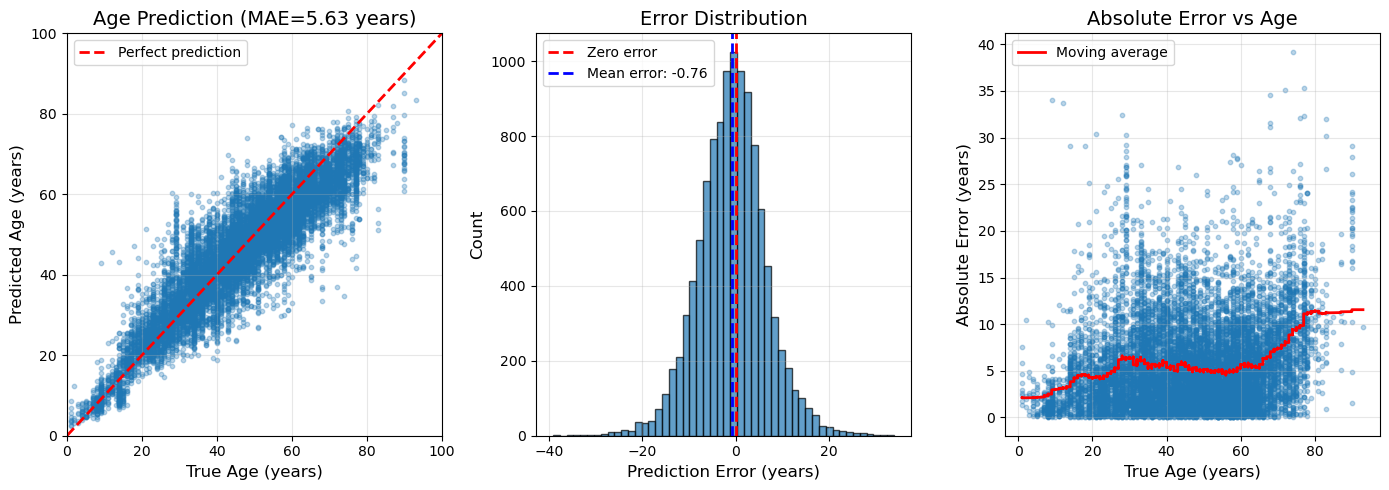


✓ New best model saved! MAE: 5.63 years

----------------------------------------------------------------------
Epoch 12, Batch    0/1226, Loss: 5.5146, Age: 5.3876, Group: 0.4232
Epoch 12, Batch   50/1226, Loss: 6.2786, Age: 6.1277, Group: 0.5031
Epoch 12, Batch  100/1226, Loss: 6.5239, Age: 6.3528, Group: 0.5702
Epoch 12, Batch  150/1226, Loss: 5.2049, Age: 5.0640, Group: 0.4696
Epoch 12, Batch  200/1226, Loss: 6.6804, Age: 6.5364, Group: 0.4798
Epoch 12, Batch  250/1226, Loss: 5.8579, Age: 5.7514, Group: 0.3549
Epoch 12, Batch  300/1226, Loss: 5.2456, Age: 5.1436, Group: 0.3400
Epoch 12, Batch  350/1226, Loss: 4.7870, Age: 4.6939, Group: 0.3105
Epoch 12, Batch  400/1226, Loss: 5.1390, Age: 4.9836, Group: 0.5180
Epoch 12, Batch  450/1226, Loss: 5.8140, Age: 5.7070, Group: 0.3565
Epoch 12, Batch  500/1226, Loss: 5.0563, Age: 4.9242, Group: 0.4401
Epoch 12, Batch  550/1226, Loss: 8.2554, Age: 8.0696, Group: 0.6193
Epoch 12, Batch  600/1226, Loss: 5.8183, Age: 5.6826, Group: 0.4523
Epo

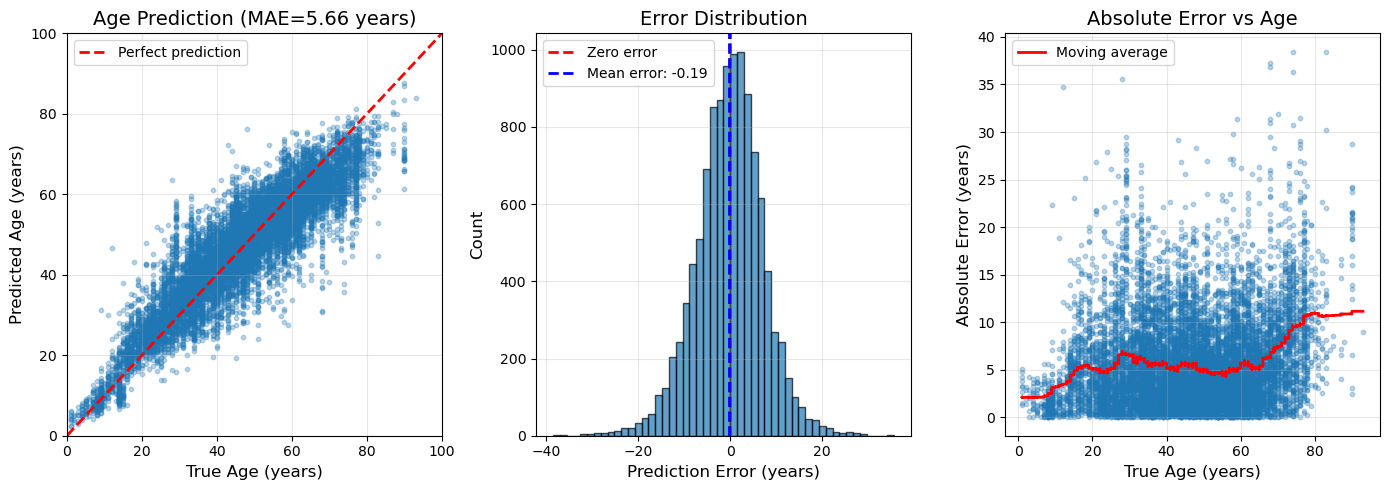


No improvement (1/7)

----------------------------------------------------------------------
Epoch 13, Batch    0/1226, Loss: 5.9784, Age: 5.8767, Group: 0.3392
Epoch 13, Batch   50/1226, Loss: 5.3159, Age: 5.1534, Group: 0.5416
Epoch 13, Batch  100/1226, Loss: 6.3380, Age: 6.1504, Group: 0.6255
Epoch 13, Batch  150/1226, Loss: 5.7117, Age: 5.5579, Group: 0.5127
Epoch 13, Batch  200/1226, Loss: 6.2388, Age: 6.1064, Group: 0.4415
Epoch 13, Batch  250/1226, Loss: 5.3388, Age: 5.2204, Group: 0.3945
Epoch 13, Batch  300/1226, Loss: 4.7551, Age: 4.5843, Group: 0.5693
Epoch 13, Batch  350/1226, Loss: 6.1184, Age: 6.0017, Group: 0.3892
Epoch 13, Batch  400/1226, Loss: 5.3222, Age: 5.1674, Group: 0.5160
Epoch 13, Batch  450/1226, Loss: 4.8601, Age: 4.7500, Group: 0.3668
Epoch 13, Batch  500/1226, Loss: 6.5138, Age: 6.4083, Group: 0.3518
Epoch 13, Batch  550/1226, Loss: 5.0007, Age: 4.8849, Group: 0.3862
Epoch 13, Batch  600/1226, Loss: 5.5094, Age: 5.3902, Group: 0.3972
Epoch 13, Batch  650/1

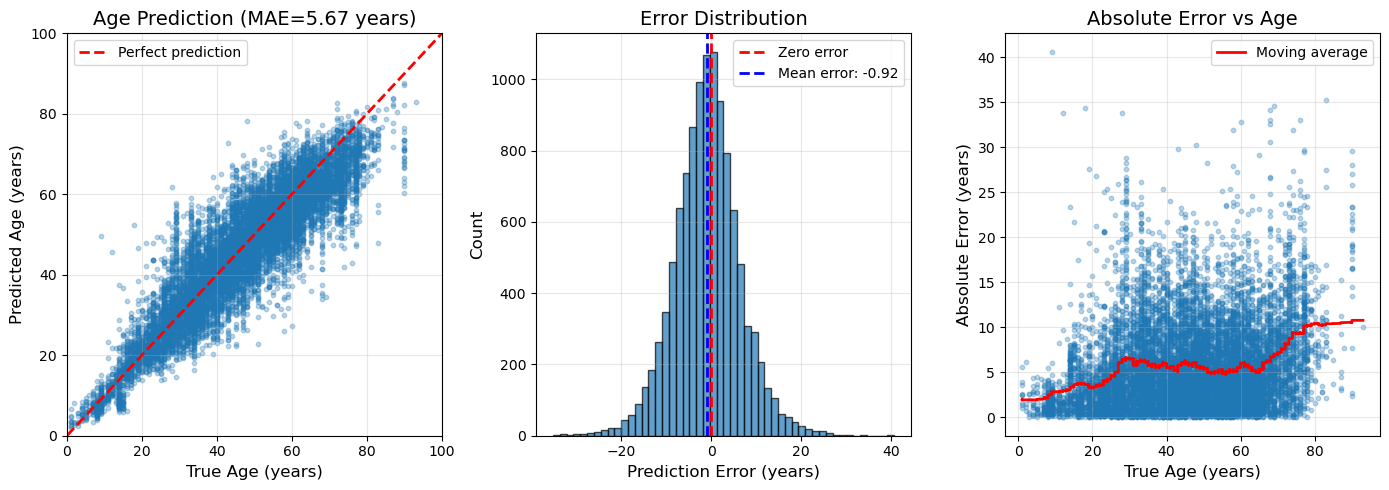


No improvement (2/7)

----------------------------------------------------------------------
Epoch 14, Batch    0/1226, Loss: 4.8856, Age: 4.8034, Group: 0.2743
Epoch 14, Batch   50/1226, Loss: 5.3219, Age: 5.1909, Group: 0.4368
Epoch 14, Batch  100/1226, Loss: 5.1392, Age: 5.0511, Group: 0.2937
Epoch 14, Batch  150/1226, Loss: 6.0987, Age: 5.9949, Group: 0.3458
Epoch 14, Batch  200/1226, Loss: 5.2515, Age: 5.1166, Group: 0.4496
Epoch 14, Batch  250/1226, Loss: 5.4338, Age: 5.3090, Group: 0.4160
Epoch 14, Batch  300/1226, Loss: 5.3031, Age: 5.2096, Group: 0.3115
Epoch 14, Batch  350/1226, Loss: 5.4426, Age: 5.2770, Group: 0.5520
Epoch 14, Batch  400/1226, Loss: 4.6946, Age: 4.5914, Group: 0.3441
Epoch 14, Batch  450/1226, Loss: 6.1969, Age: 6.0664, Group: 0.4348
Epoch 14, Batch  500/1226, Loss: 4.9516, Age: 4.8200, Group: 0.4387
Epoch 14, Batch  550/1226, Loss: 5.6251, Age: 5.5133, Group: 0.3726
Epoch 14, Batch  600/1226, Loss: 5.8595, Age: 5.7443, Group: 0.3840
Epoch 14, Batch  650/1

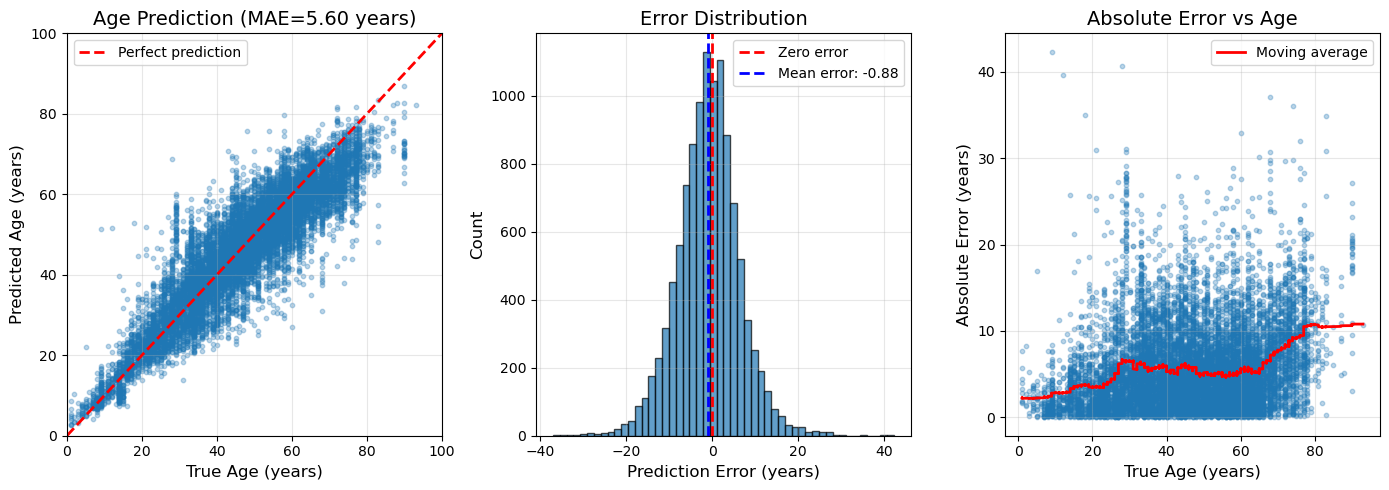


✓ New best model saved! MAE: 5.60 years

----------------------------------------------------------------------
Epoch 15, Batch    0/1226, Loss: 5.7308, Age: 5.6470, Group: 0.2796
Epoch 15, Batch   50/1226, Loss: 5.2405, Age: 5.1028, Group: 0.4590
Epoch 15, Batch  100/1226, Loss: 6.6046, Age: 6.4198, Group: 0.6158
Epoch 15, Batch  150/1226, Loss: 5.5751, Age: 5.4696, Group: 0.3516
Epoch 15, Batch  200/1226, Loss: 5.2840, Age: 5.1962, Group: 0.2927
Epoch 15, Batch  250/1226, Loss: 6.1715, Age: 6.0525, Group: 0.3965
Epoch 15, Batch  300/1226, Loss: 4.7992, Age: 4.6941, Group: 0.3502
Epoch 15, Batch  350/1226, Loss: 6.1159, Age: 5.9843, Group: 0.4386
Epoch 15, Batch  400/1226, Loss: 5.4138, Age: 5.2639, Group: 0.4999
Epoch 15, Batch  450/1226, Loss: 4.5809, Age: 4.4827, Group: 0.3272
Epoch 15, Batch  500/1226, Loss: 5.9823, Age: 5.8549, Group: 0.4247
Epoch 15, Batch  550/1226, Loss: 5.5659, Age: 5.4106, Group: 0.5176
Epoch 15, Batch  600/1226, Loss: 5.6608, Age: 5.4896, Group: 0.5706
Epo

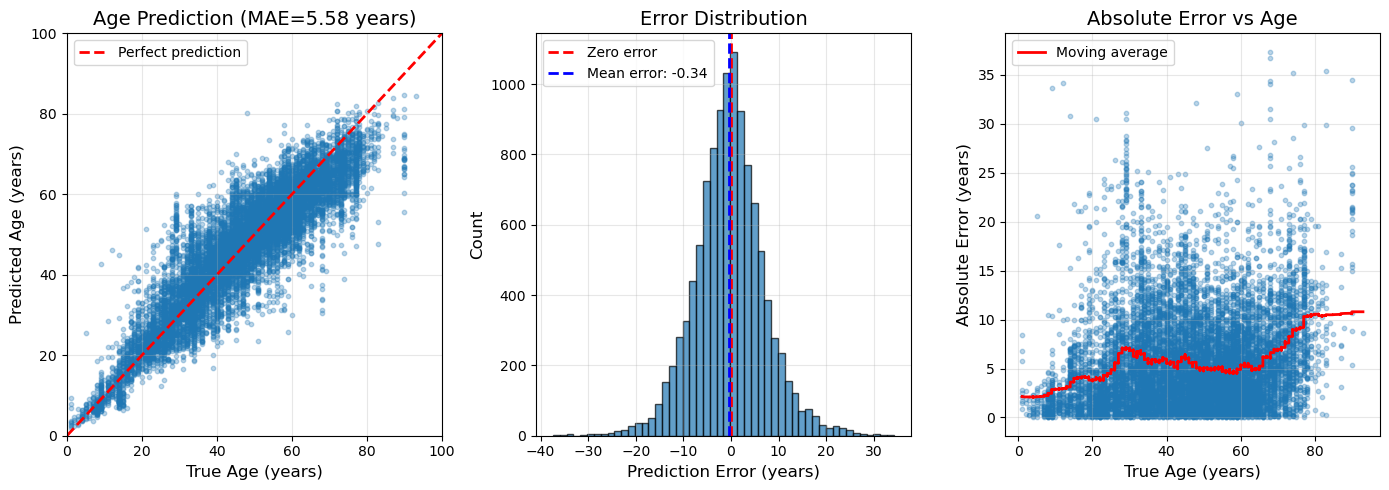


✓ New best model saved! MAE: 5.58 years

----------------------------------------------------------------------
Epoch 16, Batch    0/1226, Loss: 4.6913, Age: 4.5932, Group: 0.3273
Epoch 16, Batch   50/1226, Loss: 4.1256, Age: 4.0234, Group: 0.3407
Epoch 16, Batch  100/1226, Loss: 5.6459, Age: 5.5500, Group: 0.3198
Epoch 16, Batch  150/1226, Loss: 5.3577, Age: 5.2121, Group: 0.4853
Epoch 16, Batch  200/1226, Loss: 5.8349, Age: 5.7131, Group: 0.4061
Epoch 16, Batch  250/1226, Loss: 6.7929, Age: 6.6123, Group: 0.6021
Epoch 16, Batch  300/1226, Loss: 5.1579, Age: 5.0507, Group: 0.3574
Epoch 16, Batch  350/1226, Loss: 6.5753, Age: 6.4192, Group: 0.5202
Epoch 16, Batch  400/1226, Loss: 5.1481, Age: 5.0316, Group: 0.3882
Epoch 16, Batch  450/1226, Loss: 4.9724, Age: 4.8946, Group: 0.2593
Epoch 16, Batch  500/1226, Loss: 5.1273, Age: 5.0005, Group: 0.4228
Epoch 16, Batch  550/1226, Loss: 6.5064, Age: 6.3057, Group: 0.6691
Epoch 16, Batch  600/1226, Loss: 5.8484, Age: 5.7315, Group: 0.3898
Epo

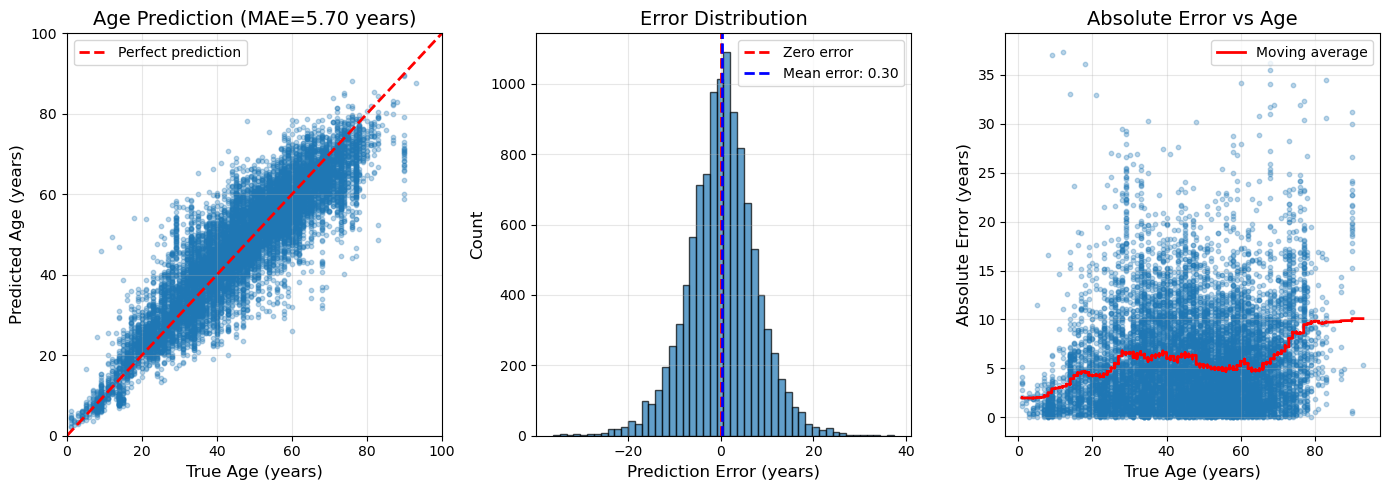


No improvement (1/7)

----------------------------------------------------------------------
Epoch 17, Batch    0/1226, Loss: 5.0927, Age: 4.9542, Group: 0.4617
Epoch 17, Batch   50/1226, Loss: 5.4022, Age: 5.2637, Group: 0.4619
Epoch 17, Batch  100/1226, Loss: 5.9820, Age: 5.8541, Group: 0.4263
Epoch 17, Batch  150/1226, Loss: 5.3883, Age: 5.2583, Group: 0.4334
Epoch 17, Batch  200/1226, Loss: 5.4478, Age: 5.3346, Group: 0.3774
Epoch 17, Batch  250/1226, Loss: 5.3596, Age: 5.1945, Group: 0.5504
Epoch 17, Batch  300/1226, Loss: 6.6595, Age: 6.5335, Group: 0.4198
Epoch 17, Batch  350/1226, Loss: 6.6284, Age: 6.4562, Group: 0.5741
Epoch 17, Batch  400/1226, Loss: 6.4840, Age: 6.3239, Group: 0.5337
Epoch 17, Batch  450/1226, Loss: 5.0850, Age: 4.9761, Group: 0.3629
Epoch 17, Batch  500/1226, Loss: 5.1581, Age: 5.0806, Group: 0.2583
Epoch 17, Batch  550/1226, Loss: 4.8969, Age: 4.8030, Group: 0.3128
Epoch 17, Batch  600/1226, Loss: 5.0403, Age: 4.9201, Group: 0.4008
Epoch 17, Batch  650/1

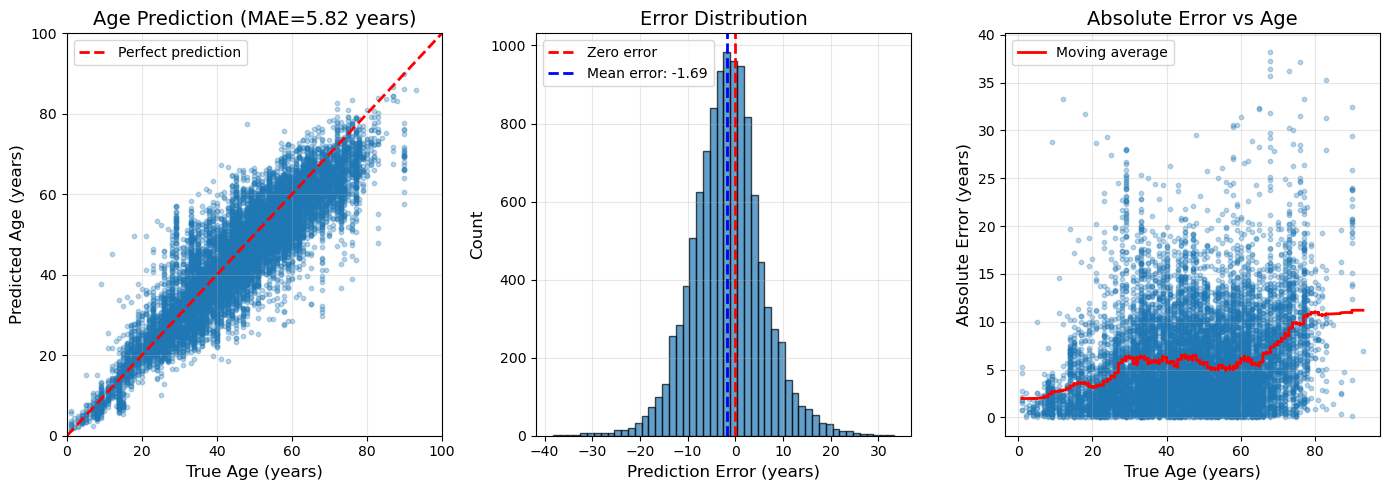


No improvement (2/7)

----------------------------------------------------------------------
Epoch 18, Batch    0/1226, Loss: 5.2712, Age: 5.1557, Group: 0.3851
Epoch 18, Batch   50/1226, Loss: 4.9092, Age: 4.8208, Group: 0.2946
Epoch 18, Batch  100/1226, Loss: 6.2787, Age: 6.1810, Group: 0.3255
Epoch 18, Batch  150/1226, Loss: 6.1087, Age: 5.9622, Group: 0.4886
Epoch 18, Batch  200/1226, Loss: 5.7904, Age: 5.6708, Group: 0.3986
Epoch 18, Batch  250/1226, Loss: 4.8222, Age: 4.7042, Group: 0.3934
Epoch 18, Batch  300/1226, Loss: 5.8107, Age: 5.5899, Group: 0.7363
Epoch 18, Batch  350/1226, Loss: 6.3537, Age: 6.1972, Group: 0.5215
Epoch 18, Batch  400/1226, Loss: 5.4509, Age: 5.3209, Group: 0.4335
Epoch 18, Batch  450/1226, Loss: 4.4770, Age: 4.3691, Group: 0.3597
Epoch 18, Batch  500/1226, Loss: 4.8648, Age: 4.7904, Group: 0.2478
Epoch 18, Batch  550/1226, Loss: 4.8989, Age: 4.8056, Group: 0.3109
Epoch 18, Batch  600/1226, Loss: 5.8285, Age: 5.6926, Group: 0.4529
Epoch 18, Batch  650/1

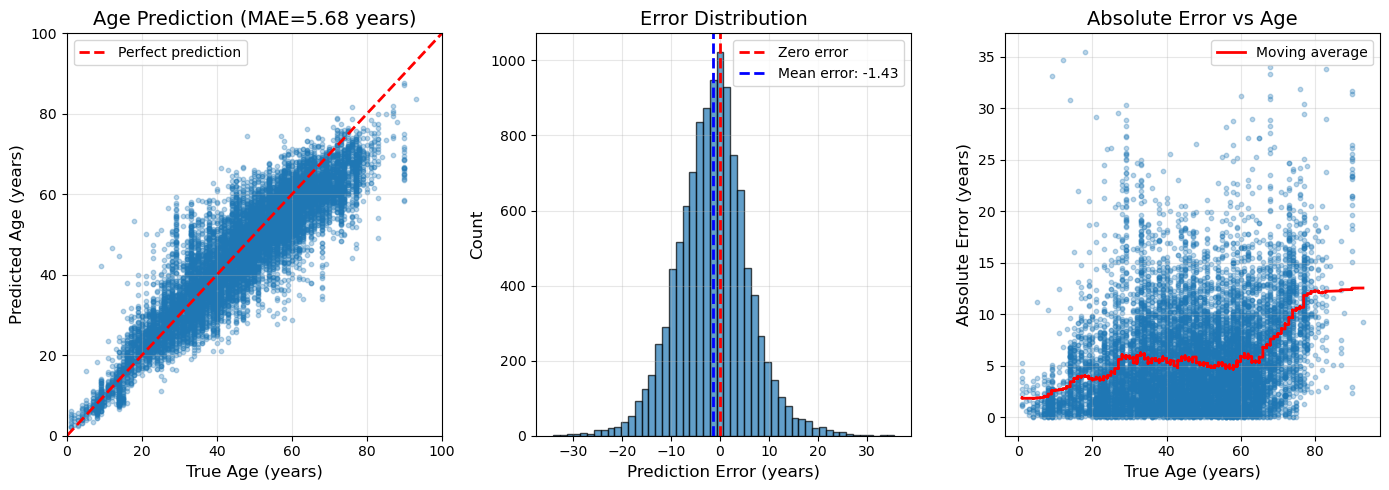


No improvement (3/7)

----------------------------------------------------------------------
Epoch 19, Batch    0/1226, Loss: 4.9677, Age: 4.8626, Group: 0.3502
Epoch 19, Batch   50/1226, Loss: 6.2301, Age: 6.1251, Group: 0.3499
Epoch 19, Batch  100/1226, Loss: 5.3728, Age: 5.2484, Group: 0.4146
Epoch 19, Batch  150/1226, Loss: 4.4837, Age: 4.3929, Group: 0.3028
Epoch 19, Batch  200/1226, Loss: 6.3856, Age: 6.2169, Group: 0.5621
Epoch 19, Batch  250/1226, Loss: 4.7172, Age: 4.6057, Group: 0.3720
Epoch 19, Batch  300/1226, Loss: 5.4685, Age: 5.3551, Group: 0.3781
Epoch 19, Batch  350/1226, Loss: 5.4492, Age: 5.3129, Group: 0.4542
Epoch 19, Batch  400/1226, Loss: 4.9732, Age: 4.8766, Group: 0.3219
Epoch 19, Batch  450/1226, Loss: 5.8762, Age: 5.7548, Group: 0.4046
Epoch 19, Batch  500/1226, Loss: 4.3262, Age: 4.2435, Group: 0.2759
Epoch 19, Batch  550/1226, Loss: 5.9169, Age: 5.7448, Group: 0.5737
Epoch 19, Batch  600/1226, Loss: 4.8764, Age: 4.7335, Group: 0.4762
Epoch 19, Batch  650/1

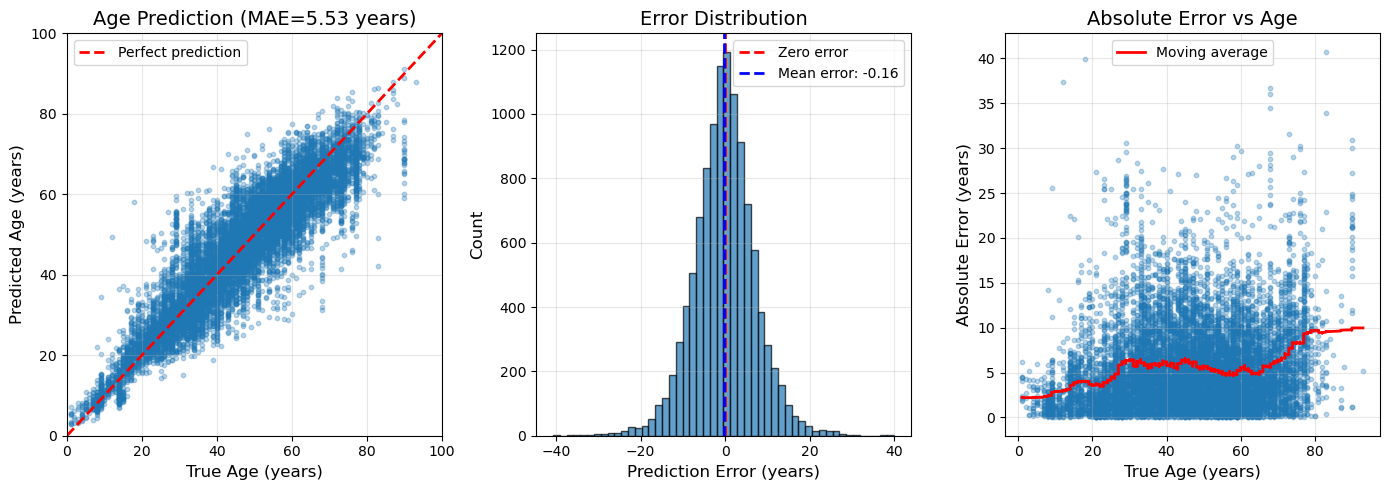


✓ New best model saved! MAE: 5.53 years

----------------------------------------------------------------------
Epoch 20, Batch    0/1226, Loss: 4.9507, Age: 4.8636, Group: 0.2905
Epoch 20, Batch   50/1226, Loss: 6.4032, Age: 6.2759, Group: 0.4243
Epoch 20, Batch  100/1226, Loss: 5.7069, Age: 5.6055, Group: 0.3379
Epoch 20, Batch  150/1226, Loss: 6.0954, Age: 5.9974, Group: 0.3266
Epoch 20, Batch  200/1226, Loss: 4.7919, Age: 4.6583, Group: 0.4453
Epoch 20, Batch  250/1226, Loss: 5.3168, Age: 5.1685, Group: 0.4946
Epoch 20, Batch  300/1226, Loss: 5.6844, Age: 5.5654, Group: 0.3969
Epoch 20, Batch  350/1226, Loss: 6.4657, Age: 6.3382, Group: 0.4247
Epoch 20, Batch  400/1226, Loss: 4.2867, Age: 4.1821, Group: 0.3487
Epoch 20, Batch  450/1226, Loss: 5.2113, Age: 5.1443, Group: 0.2233
Epoch 20, Batch  500/1226, Loss: 5.6489, Age: 5.5456, Group: 0.3444
Epoch 20, Batch  550/1226, Loss: 5.7646, Age: 5.6592, Group: 0.3512
Epoch 20, Batch  600/1226, Loss: 6.1533, Age: 6.0149, Group: 0.4615
Epo

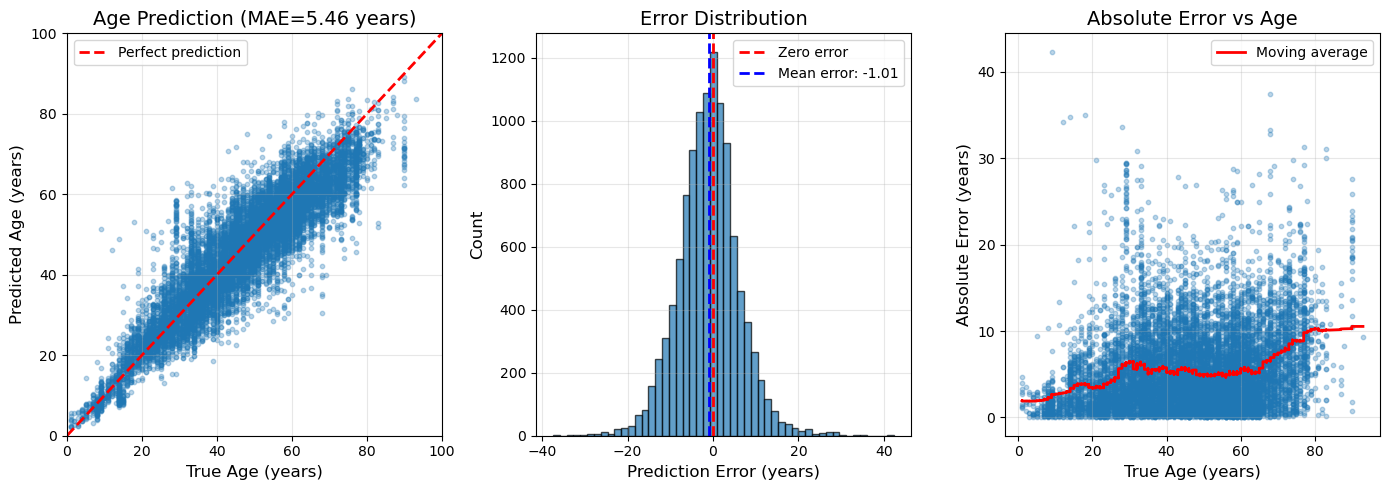


✓ New best model saved! MAE: 5.46 years

----------------------------------------------------------------------
Epoch 21, Batch    0/1226, Loss: 4.8972, Age: 4.7877, Group: 0.3651
Epoch 21, Batch   50/1226, Loss: 5.6122, Age: 5.5184, Group: 0.3128
Epoch 21, Batch  100/1226, Loss: 5.2482, Age: 5.1489, Group: 0.3308
Epoch 21, Batch  150/1226, Loss: 5.0077, Age: 4.9160, Group: 0.3058
Epoch 21, Batch  200/1226, Loss: 4.6765, Age: 4.5789, Group: 0.3252
Epoch 21, Batch  250/1226, Loss: 5.5637, Age: 5.4551, Group: 0.3620
Epoch 21, Batch  300/1226, Loss: 4.5124, Age: 4.4181, Group: 0.3144
Epoch 21, Batch  350/1226, Loss: 5.6759, Age: 5.5389, Group: 0.4566
Epoch 21, Batch  400/1226, Loss: 5.1057, Age: 5.0214, Group: 0.2809
Epoch 21, Batch  450/1226, Loss: 5.4913, Age: 5.3399, Group: 0.5049
Epoch 21, Batch  500/1226, Loss: 4.8833, Age: 4.7239, Group: 0.5312
Epoch 21, Batch  550/1226, Loss: 5.2408, Age: 5.1337, Group: 0.3569
Epoch 21, Batch  600/1226, Loss: 5.4177, Age: 5.3110, Group: 0.3556
Epo

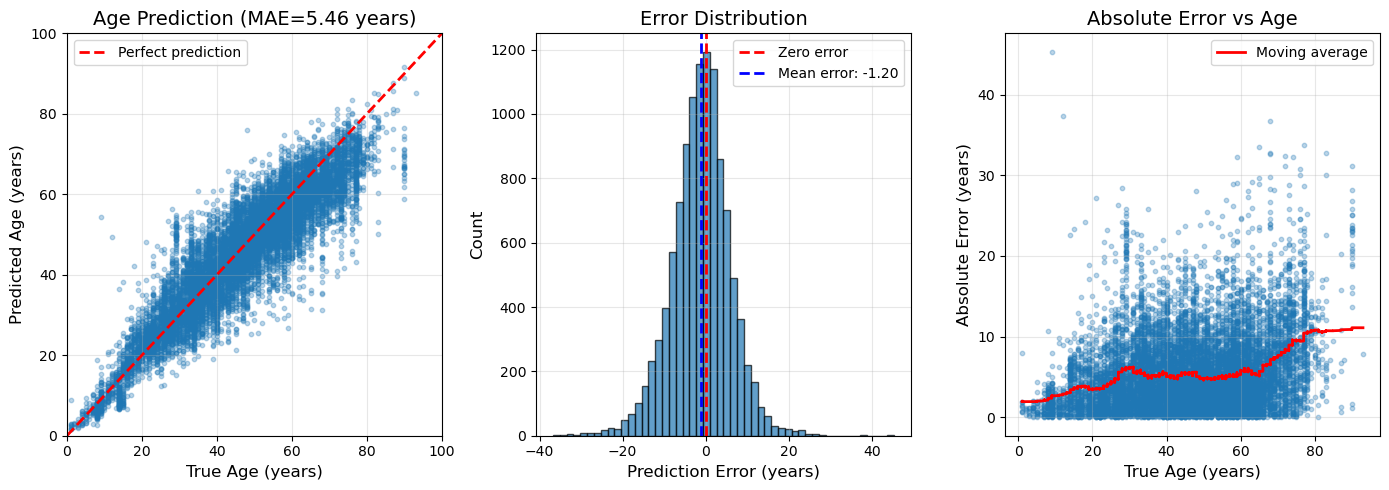


✓ New best model saved! MAE: 5.46 years

----------------------------------------------------------------------
Epoch 22, Batch    0/1226, Loss: 5.7611, Age: 5.6329, Group: 0.4273
Epoch 22, Batch   50/1226, Loss: 5.0267, Age: 4.9463, Group: 0.2677
Epoch 22, Batch  100/1226, Loss: 4.7122, Age: 4.5983, Group: 0.3795
Epoch 22, Batch  150/1226, Loss: 5.9997, Age: 5.8342, Group: 0.5517
Epoch 22, Batch  200/1226, Loss: 5.4733, Age: 5.3401, Group: 0.4438
Epoch 22, Batch  250/1226, Loss: 5.5277, Age: 5.3493, Group: 0.5945
Epoch 22, Batch  300/1226, Loss: 5.5097, Age: 5.4224, Group: 0.2912
Epoch 22, Batch  350/1226, Loss: 5.4753, Age: 5.3728, Group: 0.3418
Epoch 22, Batch  400/1226, Loss: 4.3965, Age: 4.2847, Group: 0.3729
Epoch 22, Batch  450/1226, Loss: 5.2834, Age: 5.1639, Group: 0.3983
Epoch 22, Batch  500/1226, Loss: 6.0508, Age: 5.9172, Group: 0.4453
Epoch 22, Batch  550/1226, Loss: 5.8888, Age: 5.7429, Group: 0.4865
Epoch 22, Batch  600/1226, Loss: 5.1288, Age: 5.0474, Group: 0.2714
Epo

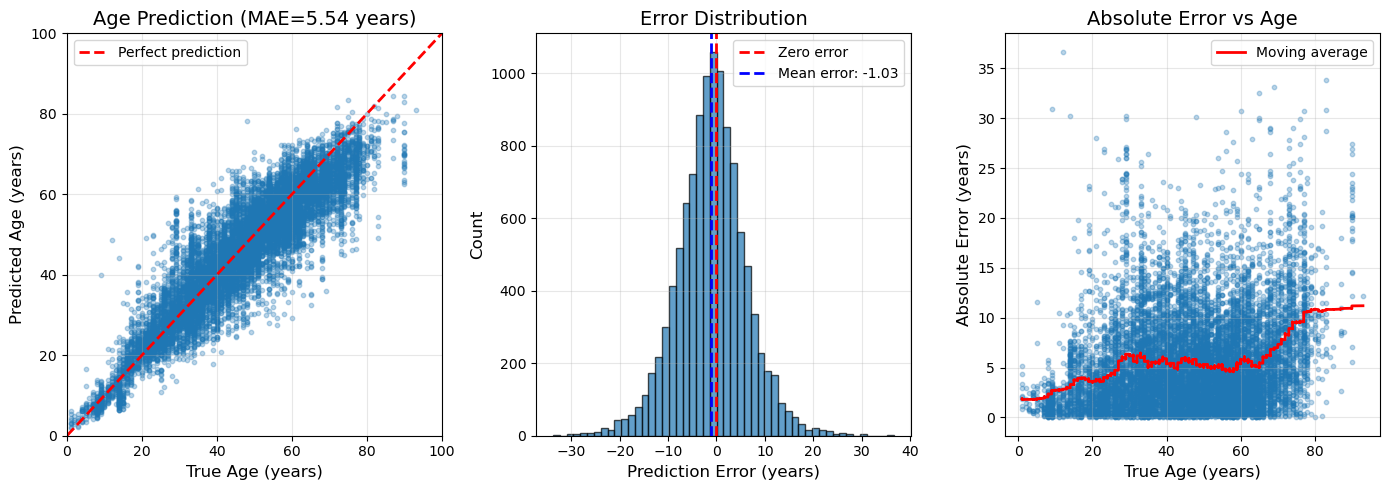


No improvement (1/7)

----------------------------------------------------------------------
Epoch 23, Batch    0/1226, Loss: 4.7207, Age: 4.6170, Group: 0.3454
Epoch 23, Batch   50/1226, Loss: 4.2211, Age: 4.1475, Group: 0.2452
Epoch 23, Batch  100/1226, Loss: 5.8626, Age: 5.7368, Group: 0.4191
Epoch 23, Batch  150/1226, Loss: 6.4092, Age: 6.2872, Group: 0.4069
Epoch 23, Batch  200/1226, Loss: 4.7391, Age: 4.6357, Group: 0.3448
Epoch 23, Batch  250/1226, Loss: 5.3734, Age: 5.2582, Group: 0.3840
Epoch 23, Batch  300/1226, Loss: 5.9895, Age: 5.8314, Group: 0.5269
Epoch 23, Batch  350/1226, Loss: 6.2082, Age: 6.0809, Group: 0.4243
Epoch 23, Batch  400/1226, Loss: 5.0762, Age: 4.9805, Group: 0.3190
Epoch 23, Batch  450/1226, Loss: 4.5239, Age: 4.4081, Group: 0.3861
Epoch 23, Batch  500/1226, Loss: 5.2933, Age: 5.1912, Group: 0.3402
Epoch 23, Batch  550/1226, Loss: 5.2297, Age: 5.1020, Group: 0.4256
Epoch 23, Batch  600/1226, Loss: 6.0030, Age: 5.8949, Group: 0.3603
Epoch 23, Batch  650/1

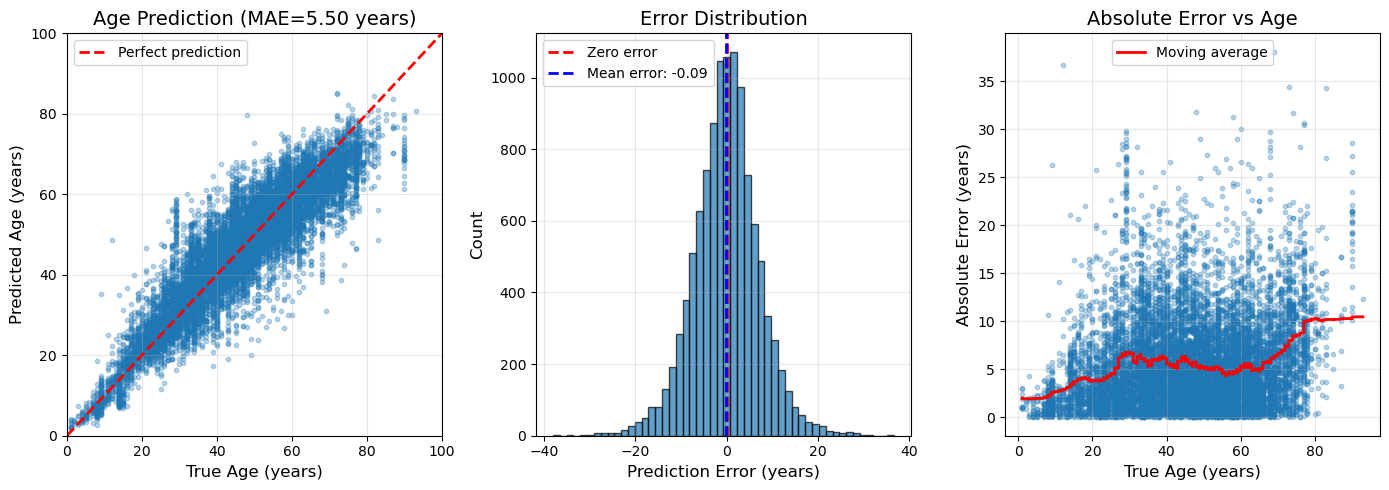


No improvement (2/7)

----------------------------------------------------------------------
Epoch 24, Batch    0/1226, Loss: 5.0170, Age: 4.8869, Group: 0.4336
Epoch 24, Batch   50/1226, Loss: 5.1828, Age: 5.0559, Group: 0.4229
Epoch 24, Batch  100/1226, Loss: 4.4271, Age: 4.3088, Group: 0.3945
Epoch 24, Batch  150/1226, Loss: 5.5070, Age: 5.3849, Group: 0.4071
Epoch 24, Batch  200/1226, Loss: 4.9911, Age: 4.8795, Group: 0.3720
Epoch 24, Batch  250/1226, Loss: 6.2245, Age: 6.0894, Group: 0.4503
Epoch 24, Batch  300/1226, Loss: 4.8697, Age: 4.6986, Group: 0.5703
Epoch 24, Batch  350/1226, Loss: 4.2358, Age: 4.1395, Group: 0.3211
Epoch 24, Batch  400/1226, Loss: 4.8993, Age: 4.7209, Group: 0.5945
Epoch 24, Batch  450/1226, Loss: 5.0937, Age: 4.9347, Group: 0.5298
Epoch 24, Batch  500/1226, Loss: 5.7840, Age: 5.6506, Group: 0.4447
Epoch 24, Batch  550/1226, Loss: 5.7803, Age: 5.6300, Group: 0.5008
Epoch 24, Batch  600/1226, Loss: 4.7610, Age: 4.6530, Group: 0.3600
Epoch 24, Batch  650/1

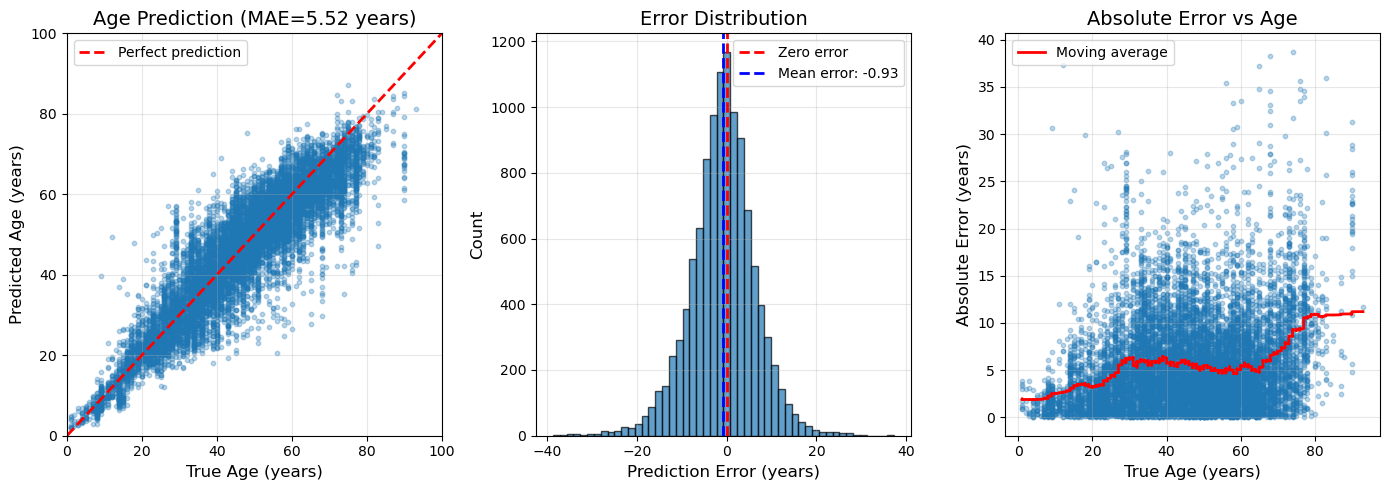


No improvement (3/7)

----------------------------------------------------------------------
Epoch 25, Batch    0/1226, Loss: 4.9441, Age: 4.8579, Group: 0.2875
Epoch 25, Batch   50/1226, Loss: 4.9688, Age: 4.8856, Group: 0.2772
Epoch 25, Batch  100/1226, Loss: 5.4498, Age: 5.3805, Group: 0.2312
Epoch 25, Batch  150/1226, Loss: 4.7131, Age: 4.5858, Group: 0.4244
Epoch 25, Batch  200/1226, Loss: 4.6652, Age: 4.5485, Group: 0.3887
Epoch 25, Batch  250/1226, Loss: 4.4818, Age: 4.3860, Group: 0.3193
Epoch 25, Batch  300/1226, Loss: 5.4666, Age: 5.3020, Group: 0.5488
Epoch 25, Batch  350/1226, Loss: 4.8255, Age: 4.7291, Group: 0.3212
Epoch 25, Batch  400/1226, Loss: 6.0090, Age: 5.8983, Group: 0.3692
Epoch 25, Batch  450/1226, Loss: 5.3161, Age: 5.1921, Group: 0.4134
Epoch 25, Batch  500/1226, Loss: 5.5756, Age: 5.4694, Group: 0.3542
Epoch 25, Batch  550/1226, Loss: 5.7281, Age: 5.5939, Group: 0.4473
Epoch 25, Batch  600/1226, Loss: 4.3318, Age: 4.2267, Group: 0.3506
Epoch 25, Batch  650/1

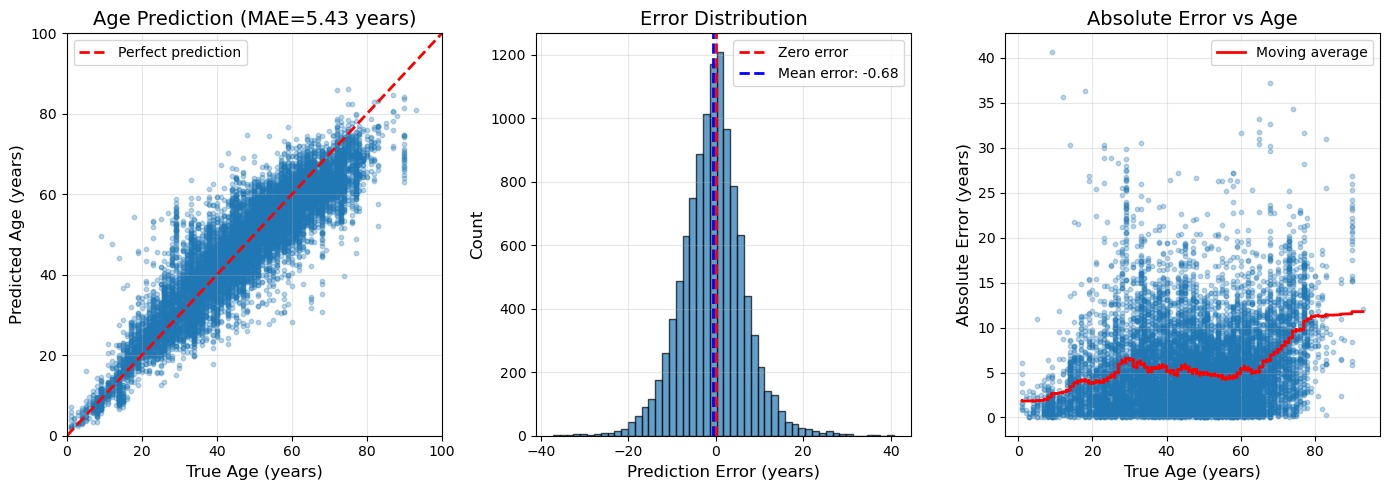


✓ New best model saved! MAE: 5.43 years

----------------------------------------------------------------------
Epoch 26, Batch    0/1226, Loss: 5.1586, Age: 5.0714, Group: 0.2907
Epoch 26, Batch   50/1226, Loss: 5.9622, Age: 5.8201, Group: 0.4738
Epoch 26, Batch  100/1226, Loss: 5.1860, Age: 5.0995, Group: 0.2884
Epoch 26, Batch  150/1226, Loss: 4.9220, Age: 4.7955, Group: 0.4214
Epoch 26, Batch  200/1226, Loss: 4.7910, Age: 4.7052, Group: 0.2859
Epoch 26, Batch  250/1226, Loss: 4.4764, Age: 4.3967, Group: 0.2658
Epoch 26, Batch  300/1226, Loss: 5.4324, Age: 5.3099, Group: 0.4084
Epoch 26, Batch  350/1226, Loss: 5.7450, Age: 5.6436, Group: 0.3379
Epoch 26, Batch  400/1226, Loss: 5.2612, Age: 5.1690, Group: 0.3075
Epoch 26, Batch  450/1226, Loss: 4.4436, Age: 4.3253, Group: 0.3944
Epoch 26, Batch  500/1226, Loss: 6.0163, Age: 5.8849, Group: 0.4380
Epoch 26, Batch  550/1226, Loss: 5.1735, Age: 5.0846, Group: 0.2965
Epoch 26, Batch  600/1226, Loss: 5.2352, Age: 5.1185, Group: 0.3892
Epo

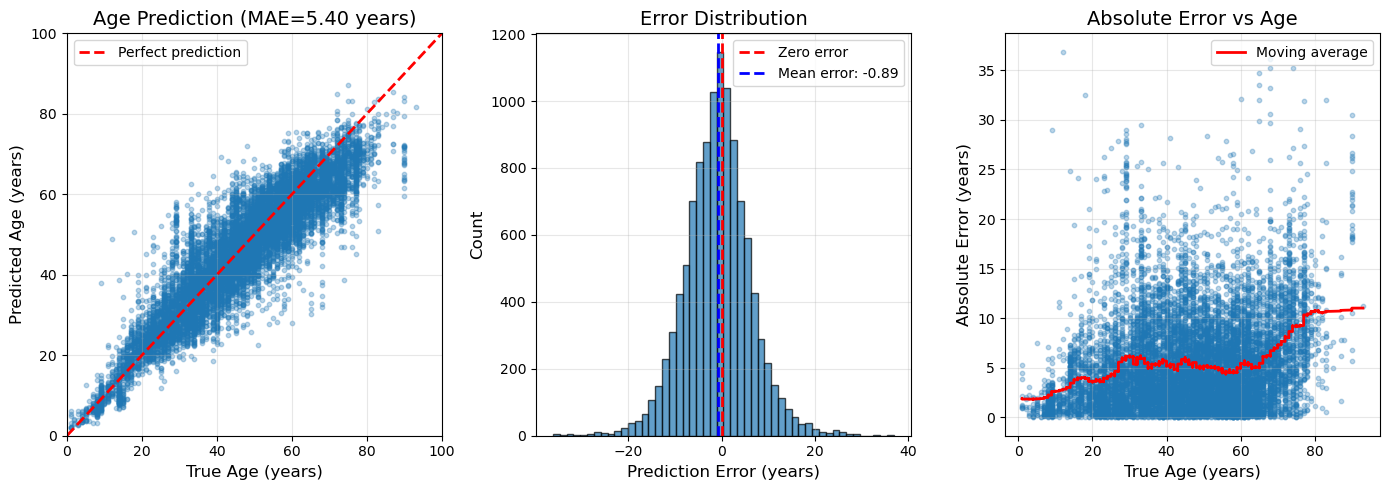


✓ New best model saved! MAE: 5.40 years

----------------------------------------------------------------------
Epoch 27, Batch    0/1226, Loss: 5.0978, Age: 4.9289, Group: 0.5632
Epoch 27, Batch   50/1226, Loss: 4.8296, Age: 4.7390, Group: 0.3020
Epoch 27, Batch  100/1226, Loss: 5.2136, Age: 5.1028, Group: 0.3692
Epoch 27, Batch  150/1226, Loss: 4.9442, Age: 4.8092, Group: 0.4497
Epoch 27, Batch  200/1226, Loss: 4.4186, Age: 4.3078, Group: 0.3692
Epoch 27, Batch  250/1226, Loss: 5.6658, Age: 5.5042, Group: 0.5389
Epoch 27, Batch  300/1226, Loss: 5.0638, Age: 4.9519, Group: 0.3730
Epoch 27, Batch  350/1226, Loss: 4.8514, Age: 4.7482, Group: 0.3439
Epoch 27, Batch  400/1226, Loss: 4.2294, Age: 4.1220, Group: 0.3582
Epoch 27, Batch  450/1226, Loss: 5.2336, Age: 5.1442, Group: 0.2979
Epoch 27, Batch  500/1226, Loss: 4.2106, Age: 4.1249, Group: 0.2854
Epoch 27, Batch  550/1226, Loss: 4.2544, Age: 4.1286, Group: 0.4196
Epoch 27, Batch  600/1226, Loss: 4.7198, Age: 4.6340, Group: 0.2859
Epo

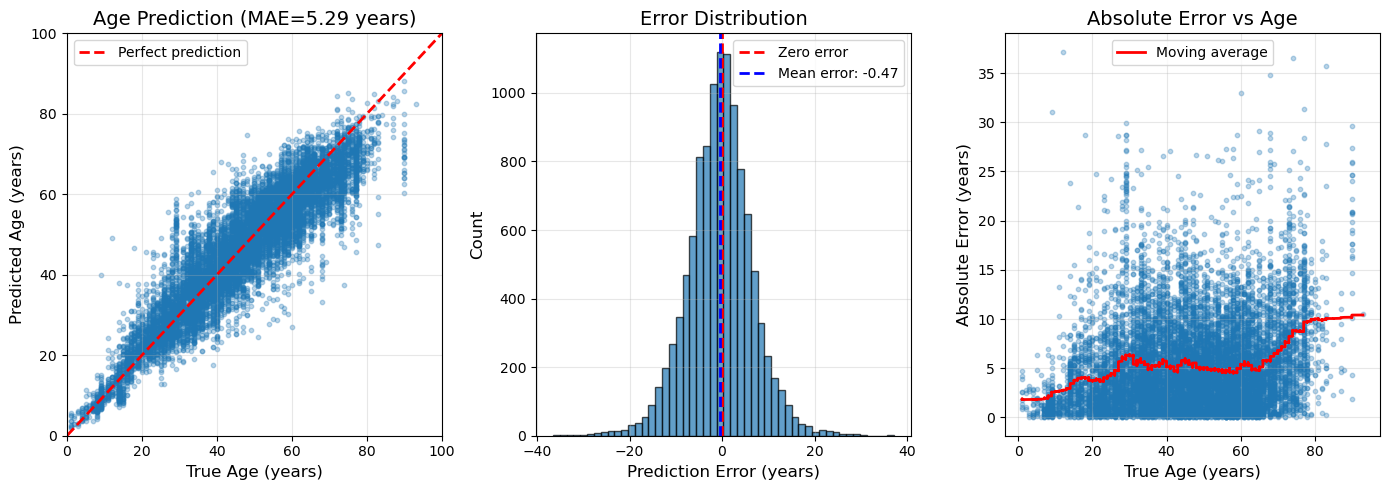


✓ New best model saved! MAE: 5.29 years

----------------------------------------------------------------------
Epoch 28, Batch    0/1226, Loss: 5.1876, Age: 5.0928, Group: 0.3158
Epoch 28, Batch   50/1226, Loss: 5.1687, Age: 5.0843, Group: 0.2814
Epoch 28, Batch  100/1226, Loss: 5.0289, Age: 4.8993, Group: 0.4322
Epoch 28, Batch  150/1226, Loss: 4.8690, Age: 4.7389, Group: 0.4338
Epoch 28, Batch  200/1226, Loss: 5.1518, Age: 5.0692, Group: 0.2755
Epoch 28, Batch  250/1226, Loss: 4.4216, Age: 4.3284, Group: 0.3104
Epoch 28, Batch  300/1226, Loss: 4.8235, Age: 4.6992, Group: 0.4145
Epoch 28, Batch  350/1226, Loss: 4.6342, Age: 4.5328, Group: 0.3383
Epoch 28, Batch  400/1226, Loss: 5.0168, Age: 4.9202, Group: 0.3221
Epoch 28, Batch  450/1226, Loss: 5.6465, Age: 5.5240, Group: 0.4083
Epoch 28, Batch  500/1226, Loss: 4.2443, Age: 4.1534, Group: 0.3028
Epoch 28, Batch  550/1226, Loss: 4.7288, Age: 4.6362, Group: 0.3089
Epoch 28, Batch  600/1226, Loss: 4.1891, Age: 4.1158, Group: 0.2444
Epo

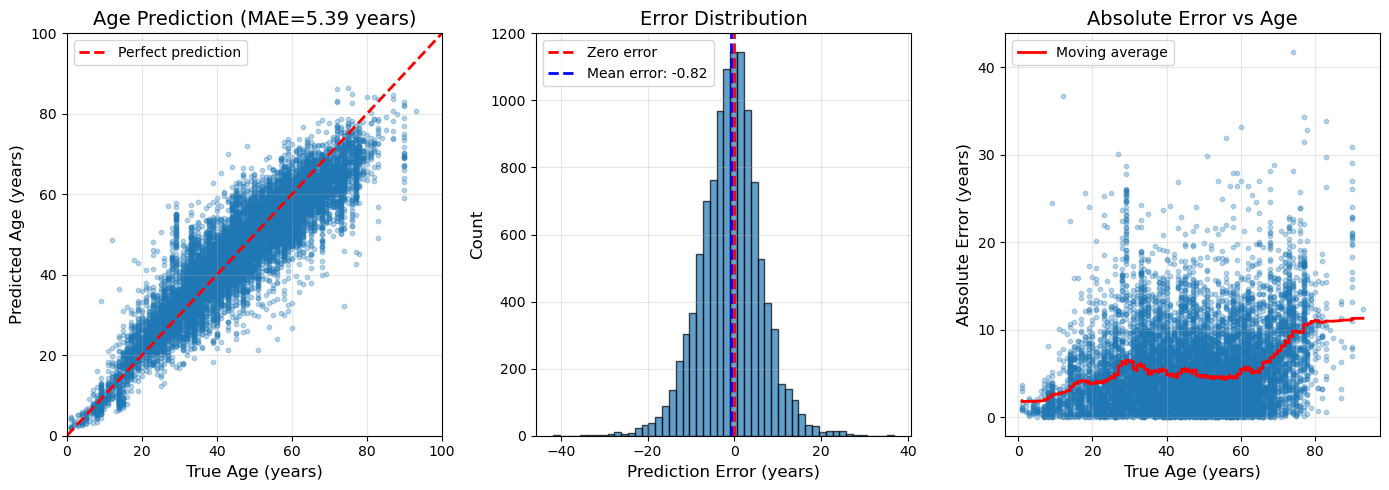


No improvement (1/7)

----------------------------------------------------------------------
Epoch 29, Batch    0/1226, Loss: 5.0589, Age: 4.9680, Group: 0.3030
Epoch 29, Batch   50/1226, Loss: 4.0638, Age: 3.9938, Group: 0.2335
Epoch 29, Batch  100/1226, Loss: 4.7647, Age: 4.6794, Group: 0.2843
Epoch 29, Batch  150/1226, Loss: 4.6958, Age: 4.5894, Group: 0.3546
Epoch 29, Batch  200/1226, Loss: 4.9946, Age: 4.8703, Group: 0.4141
Epoch 29, Batch  250/1226, Loss: 4.5740, Age: 4.4900, Group: 0.2801
Epoch 29, Batch  300/1226, Loss: 4.5009, Age: 4.3907, Group: 0.3673
Epoch 29, Batch  350/1226, Loss: 5.1467, Age: 5.0428, Group: 0.3461
Epoch 29, Batch  400/1226, Loss: 4.8756, Age: 4.7756, Group: 0.3334
Epoch 29, Batch  450/1226, Loss: 4.5172, Age: 4.4221, Group: 0.3172
Epoch 29, Batch  500/1226, Loss: 4.3889, Age: 4.2776, Group: 0.3712
Epoch 29, Batch  550/1226, Loss: 4.2607, Age: 4.1664, Group: 0.3141
Epoch 29, Batch  600/1226, Loss: 4.5800, Age: 4.4841, Group: 0.3197
Epoch 29, Batch  650/1

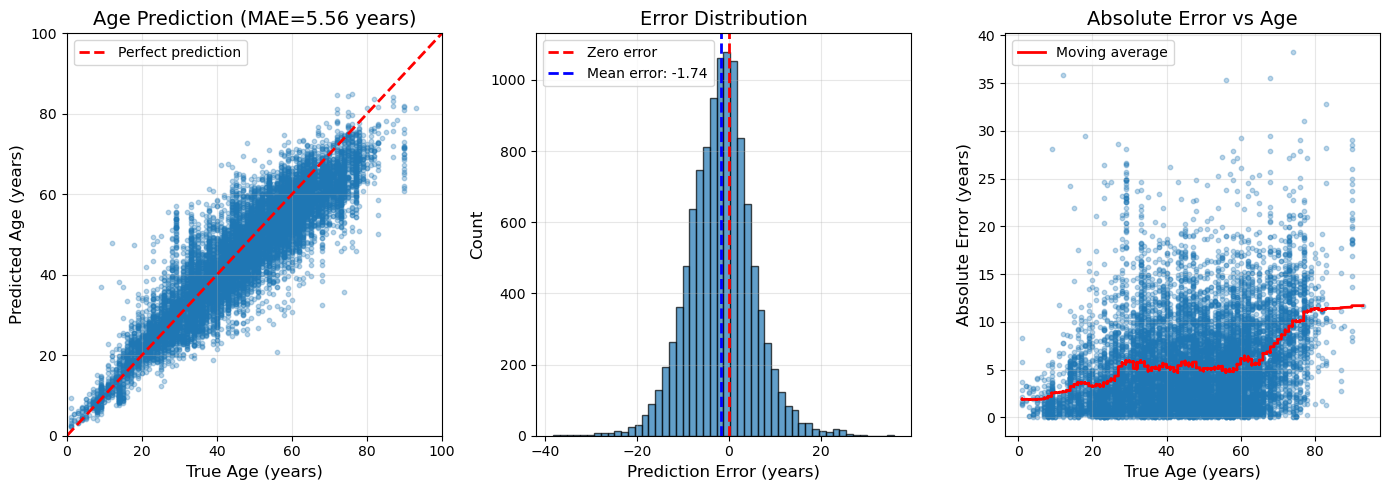


No improvement (2/7)

----------------------------------------------------------------------
Epoch 30, Batch    0/1226, Loss: 4.2467, Age: 4.1933, Group: 0.1779
Epoch 30, Batch   50/1226, Loss: 4.6528, Age: 4.5223, Group: 0.4350
Epoch 30, Batch  100/1226, Loss: 5.5539, Age: 5.4482, Group: 0.3524
Epoch 30, Batch  150/1226, Loss: 4.3029, Age: 4.2296, Group: 0.2444
Epoch 30, Batch  200/1226, Loss: 4.8738, Age: 4.7761, Group: 0.3257
Epoch 30, Batch  250/1226, Loss: 5.5249, Age: 5.4201, Group: 0.3494
Epoch 30, Batch  300/1226, Loss: 5.1754, Age: 5.0939, Group: 0.2714
Epoch 30, Batch  350/1226, Loss: 4.9627, Age: 4.8810, Group: 0.2722
Epoch 30, Batch  400/1226, Loss: 4.0731, Age: 3.9897, Group: 0.2782
Epoch 30, Batch  450/1226, Loss: 5.8454, Age: 5.7274, Group: 0.3936
Epoch 30, Batch  500/1226, Loss: 4.1408, Age: 4.0277, Group: 0.3770
Epoch 30, Batch  550/1226, Loss: 4.1576, Age: 4.0958, Group: 0.2061
Epoch 30, Batch  600/1226, Loss: 4.4677, Age: 4.3746, Group: 0.3103
Epoch 30, Batch  650/1

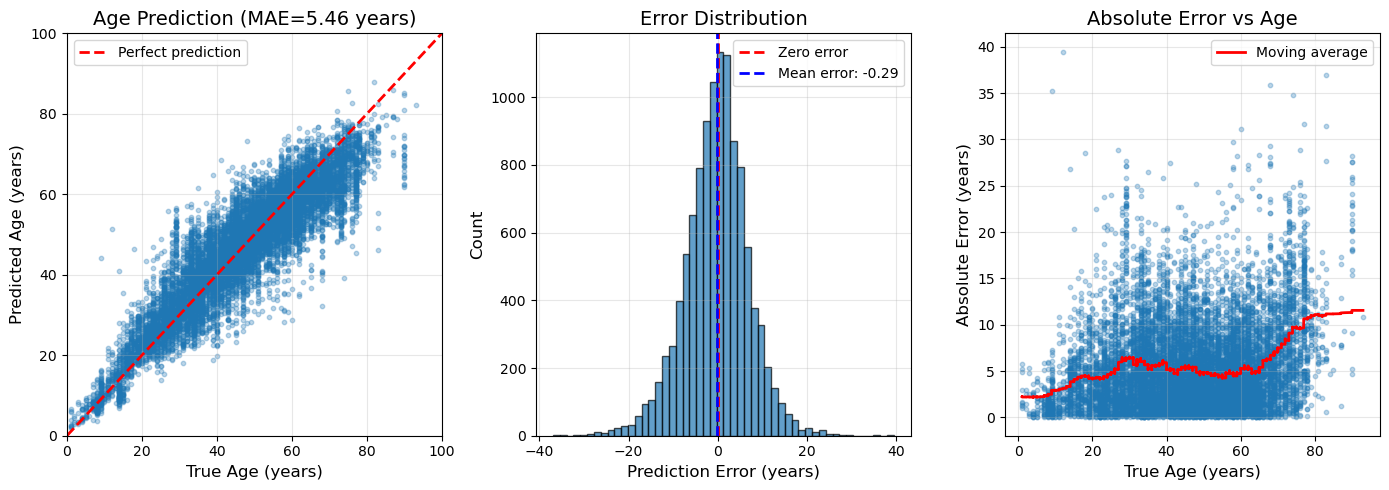


No improvement (3/7)

----------------------------------------------------------------------

FINAL TEST EVALUATION

AGE PREDICTION RESULTS

Age Regression Metrics:
  MAE:  5.27 years
  RMSE: 6.98 years
  Within 5 years:  58.2%
  Within 10 years: 86.3%

Age Group Classification:
  Accuracy: 79.1%

                     precision    recall  f1-score   support

       Child (0-17)       0.86      0.76      0.81       910
Young Adult (18-39)       0.76      0.80      0.78      5894
 Middle Age (40-64)       0.82      0.84      0.83     12696
      Elderly (65+)       0.68      0.56      0.62      2928

           accuracy                           0.79     22428
          macro avg       0.78      0.74      0.76     22428
       weighted avg       0.79      0.79      0.79     22428


✓ Visualization saved to 'age_prediction_results.png'


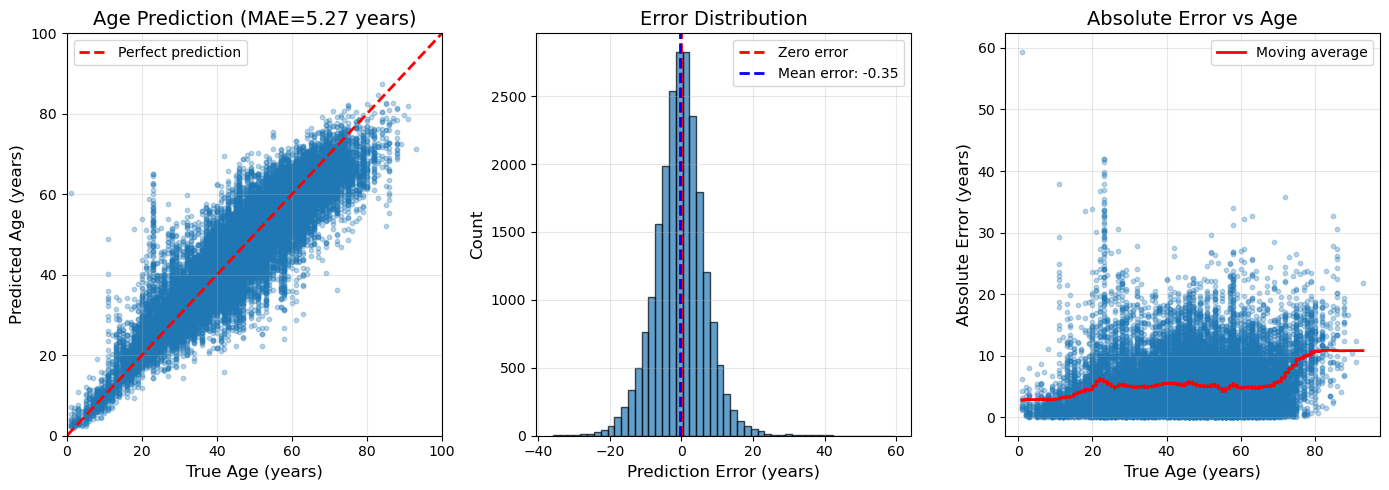


TRAINING COMPLETE!
Best Model Performance:
  MAE:  5.27 years
  RMSE: 6.98 years
  Within 5 years:  58.2%
  Within 10 years: 86.3%
  Age Group Accuracy: 79.1%

✓ Model saved to 'best_age_predictor.pth'


In [3]:

# ============================================================================
# DATASET CLASS
# ============================================================================
class ChestXrayAgeDataset(Dataset):
    """Dataset for age prediction"""
    def __init__(self, root, csv_file, image_list_file, transform=None):
        super().__init__()
        self.root = root
        self.transform = transform
        
        # Load data
        df = pd.read_csv(csv_file)
        with open(image_list_file, 'r') as f:
            image_files = [line.strip().split()[0].split('/')[-1] for line in f]
        
        df_filtered = df[df['Image Index'].isin(image_files)]
        
        self.samples = []
        skipped = 0
        
        for _, row in df_filtered.iterrows():
            # Skip if no age
            if pd.isna(row['Patient Age']) or row['Patient Age'] <= 0:
                skipped += 1
                continue
            
            # Check if image exists
            image_path = f"{root}/images/{row['Image Index']}"
            if not os.path.exists(image_path):
                skipped += 1
                continue
            
            self.samples.append({
                'image_path': image_path,
                'age': int(row['Patient Age']),
                'gender': row.get('Patient Gender', 'U'),
                'patient_id': str(row['Patient ID'])
            })
        
        print(f"\nDataset loaded: {len(self.samples)} samples (skipped {skipped})")
        if len(self.samples) > 0:
            ages = [s['age'] for s in self.samples]
            print(f"Age range: [{min(ages)}, {max(ages)}], Mean: {np.mean(ages):.1f}")
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, idx):
        sample = self.samples[idx]
        
        try:
            image = Image.open(sample['image_path']).convert('RGB')
            if self.transform:
                image = self.transform(image)
        except Exception as e:
            print(f"Error loading {sample['image_path']}: {e}")
            image = torch.zeros(3, 224, 224)
        
        # Gender encoding
        gender_map = {'M': 0.0, 'F': 1.0, 'U': 0.5}
        gender_encoded = gender_map.get(sample['gender'], 0.5)
        
        return {
            'x': image,
            'age': torch.tensor(sample['age'], dtype=torch.long),
            'gender': torch.tensor(gender_encoded, dtype=torch.float32),
            'patient_id': sample['patient_id']
        }


# ============================================================================
# AGE PREDICTION MODEL
# ============================================================================
class ChestXrayAgePredictor(BaseModel):
    """Predict patient age from chest X-ray"""
    def __init__(self, dataset, feature_keys, label_key, mode="regression", **kwargs):
        super().__init__(dataset, feature_keys, label_key, mode, **kwargs)
        
        # Backbone
        self.backbone = torch.hub.load('pytorch/vision', 'densenet121', 
                                       weights='DenseNet121_Weights.IMAGENET1K_V1')
        visual_dim = self.backbone.classifier.in_features
        self.backbone.classifier = nn.Identity()
        
        # Freeze early layers for faster training
        for name, param in self.backbone.named_parameters():
            if 'denseblock4' not in name and 'transition3' not in name:
                param.requires_grad = False
        
        # Age regression head
        self.age_regressor = nn.Sequential(
            nn.Linear(visual_dim, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128, 1)  # Single output: age
        )
        
        # Age group classifier (auxiliary task)
        self.age_group_classifier = nn.Sequential(
            nn.Linear(visual_dim, 256),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(256, 4)  # 4 age groups
        )
        
        self.age_groups = ['Child (0-17)', 'Young Adult (18-39)', 
                          'Middle Age (40-64)', 'Elderly (65+)']
    
    def get_age_group_label(self, age):
        """Convert age to group index"""
        age_group = torch.zeros_like(age, dtype=torch.long)
        age_group[age < 18] = 0
        age_group[(age >= 18) & (age < 40)] = 1
        age_group[(age >= 40) & (age < 65)] = 2
        age_group[age >= 65] = 3
        return age_group
    
    def forward(self, **kwargs):
        images = kwargs['x']
        true_age = kwargs.get('age')  # Ground truth age
        
        images = images.to(next(self.parameters()).device)
        
        # Extract features
        features = self.backbone(images)
        
        # Predict age (regression)
        predicted_age = self.age_regressor(features).squeeze()
        
        # Predict age group (classification)
        age_group_logits = self.age_group_classifier(features)
        
        if true_age is not None:
            true_age = true_age.to(next(self.parameters()).device)
            
            # Multi-task loss
            # 1. Regression loss (MAE)
            age_loss = nn.L1Loss()(predicted_age, true_age.float())
            
            # 2. Classification loss
            true_age_group = self.get_age_group_label(true_age)
            group_loss = nn.CrossEntropyLoss()(age_group_logits, true_age_group)
            
            # Combined loss
            total_loss = age_loss + 0.3 * group_loss
            
            return {
                'loss': total_loss,
                'age_loss': age_loss,
                'group_loss': group_loss,
                'predicted_age': predicted_age,
                'predicted_group': torch.argmax(age_group_logits, dim=1),
                'true_age': true_age,
                'true_group': true_age_group
            }
        else:
            return {
                'loss': torch.tensor(0.0),
                'predicted_age': predicted_age,
                'predicted_group': torch.argmax(age_group_logits, dim=1)
            }


# ============================================================================
# HELPER FUNCTION TO MOVE BATCH TO DEVICE
# ============================================================================
def batch_to_device(batch, device):
    """Move batch to device, handling non-tensor values"""
    batch_on_device = {}
    for k, v in batch.items():
        if torch.is_tensor(v):
            batch_on_device[k] = v.to(device)
        else:
            batch_on_device[k] = v  # Keep non-tensors as-is (like patient_id)
    return batch_on_device


# ============================================================================
# EVALUATION FUNCTION
# ============================================================================
def evaluate_age_prediction(model, dataloader, device):
    """Evaluate age prediction with detailed metrics"""
    model.eval()
    
    all_pred_ages = []
    all_true_ages = []
    all_pred_groups = []
    all_true_groups = []
    
    with torch.no_grad():
        for batch in dataloader:
            # Move batch to device (only tensors)
            batch_device = batch_to_device(batch, device)
            
            # Forward pass
            outputs = model(**batch_device)
            
            all_pred_ages.extend(outputs['predicted_age'].cpu().numpy())
            all_true_ages.extend(outputs['true_age'].cpu().numpy())
            all_pred_groups.extend(outputs['predicted_group'].cpu().numpy())
            all_true_groups.extend(outputs['true_group'].cpu().numpy())
    
    all_pred_ages = np.array(all_pred_ages)
    all_true_ages = np.array(all_true_ages)
    
    # Metrics
    mae = np.abs(all_pred_ages - all_true_ages).mean()
    rmse = np.sqrt(((all_pred_ages - all_true_ages) ** 2).mean())
    
    # Accuracy within N years
    within_5 = (np.abs(all_pred_ages - all_true_ages) <= 5).mean() * 100
    within_10 = (np.abs(all_pred_ages - all_true_ages) <= 10).mean() * 100
    
    # Group classification accuracy
    group_acc = accuracy_score(all_true_groups, all_pred_groups)
    
    print(f"\n{'='*60}")
    print("AGE PREDICTION RESULTS")
    print(f"{'='*60}")
    print(f"\nAge Regression Metrics:")
    print(f"  MAE:  {mae:.2f} years")
    print(f"  RMSE: {rmse:.2f} years")
    print(f"  Within 5 years:  {within_5:.1f}%")
    print(f"  Within 10 years: {within_10:.1f}%")
    print(f"\nAge Group Classification:")
    print(f"  Accuracy: {group_acc:.1%}")
    print("\n" + classification_report(
        all_true_groups, all_pred_groups,
        target_names=['Child (0-17)', 'Young Adult (18-39)', 
                     'Middle Age (40-64)', 'Elderly (65+)'],
        zero_division=0
    ))
    
    # Visualize predictions
    visualize_age_predictions(all_true_ages, all_pred_ages, mae)
    
    return {
        'mae': mae,
        'rmse': rmse,
        'within_5': within_5,
        'within_10': within_10,
        'group_acc': group_acc
    }


def visualize_age_predictions(true_ages, pred_ages, mae):
    """Visualize age prediction results"""
    plt.figure(figsize=(14, 5))
    
    # Scatter plot
    plt.subplot(1, 3, 1)
    plt.scatter(true_ages, pred_ages, alpha=0.3, s=10)
    plt.plot([0, 100], [0, 100], 'r--', label='Perfect prediction', linewidth=2)
    plt.xlabel('True Age (years)', fontsize=12)
    plt.ylabel('Predicted Age (years)', fontsize=12)
    plt.title(f'Age Prediction (MAE={mae:.2f} years)', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xlim(0, 100)
    plt.ylim(0, 100)
    
    # Error distribution
    plt.subplot(1, 3, 2)
    errors = pred_ages - true_ages
    plt.hist(errors, bins=50, edgecolor='black', alpha=0.7)
    plt.axvline(0, color='r', linestyle='--', linewidth=2, label='Zero error')
    plt.axvline(errors.mean(), color='blue', linestyle='--', linewidth=2, 
                label=f'Mean error: {errors.mean():.2f}')
    plt.xlabel('Prediction Error (years)', fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title('Error Distribution', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Absolute error by age
    plt.subplot(1, 3, 3)
    abs_errors = np.abs(errors)
    plt.scatter(true_ages, abs_errors, alpha=0.3, s=10)
    
    # Moving average
    try:
        from scipy.ndimage import uniform_filter1d
        sorted_idx = np.argsort(true_ages)
        sorted_ages = true_ages[sorted_idx]
        sorted_errors = abs_errors[sorted_idx]
        window_size = max(len(sorted_ages) // 20, 1)
        if window_size > 1:
            smoothed_errors = uniform_filter1d(sorted_errors, size=window_size)
            plt.plot(sorted_ages, smoothed_errors, 'r-', linewidth=2, label='Moving average')
    except ImportError:
        pass  # Skip if scipy not available
    
    plt.xlabel('True Age (years)', fontsize=12)
    plt.ylabel('Absolute Error (years)', fontsize=12)
    plt.title('Absolute Error vs Age', fontsize=14)
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('age_prediction_results.png', dpi=300, bbox_inches='tight')
    print(f"\n✓ Visualization saved to 'age_prediction_results.png'")
    plt.show()


# ============================================================================
# TRAINING FUNCTION
# ============================================================================
def train_age_predictor():
    """Train age prediction model"""
    
    print("="*70)
    print("CHEST X-RAY AGE PREDICTION TRAINING")
    print("="*70)
    
    # Transforms
    train_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.RandomCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ColorJitter(brightness=0.1, contrast=0.1),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    val_transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    # Load datasets
    print("\nLoading training dataset...")
    train_dataset = ChestXrayAgeDataset(
        root='CXR8',
        csv_file='CXR8/Data_Entry_2017_v2020.csv',
        image_list_file='dataset_splits/train.txt',
        transform=train_transform
    )
    
    print("\nLoading validation dataset...")
    val_dataset = ChestXrayAgeDataset(
        root='CXR8',
        csv_file='CXR8/Data_Entry_2017_v2020.csv',
        image_list_file='dataset_splits/val.txt',
        transform=val_transform
    )
    
    print("\nLoading test dataset...")
    test_dataset = ChestXrayAgeDataset(
        root='CXR8',
        csv_file='CXR8/Data_Entry_2017_v2020.csv',
        image_list_file='dataset_splits/test.txt',
        transform=val_transform
    )
    
    # Check if datasets are valid
    if len(train_dataset) == 0 or len(val_dataset) == 0:
        raise ValueError("Training or validation dataset is empty!")
    
    # Dataloaders
    train_loader = DataLoader(
        train_dataset, batch_size=64, shuffle=True, 
        num_workers=4, pin_memory=True
    )
    val_loader = DataLoader(
        val_dataset, batch_size=64, shuffle=False,
        num_workers=4, pin_memory=True
    )
    test_loader = DataLoader(
        test_dataset, batch_size=64, shuffle=False,
        num_workers=4, pin_memory=True
    )
    
    # Model
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"\nUsing device: {device}")
    
    model = ChestXrayAgePredictor(
        dataset=train_dataset,
        feature_keys=['x'],
        label_key='age',
        mode='regression'
    ).to(device)
    
    print(f"\nModel created with {sum(p.numel() for p in model.parameters() if p.requires_grad):,} trainable parameters")
    
    # Optimizer
    optimizer = torch.optim.AdamW(
        model.parameters(),
        lr=0.0001,
        weight_decay=0.01
    )
    
    # Learning rate scheduler
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, mode='min', factor=0.5, patience=3, verbose=True
    )
    
    # Training loop
    print("\n" + "="*70)
    print("STARTING TRAINING")
    print("="*70)
    
    best_mae = float('inf')
    patience = 0
    max_patience = 7
    
    for epoch in range(30):
        model.train()
        train_loss = 0
        train_age_loss = 0
        train_group_loss = 0
        num_batches = 0
        
        for batch_idx, batch in enumerate(train_loader):
            # Move to device (only tensors)
            batch_device = batch_to_device(batch, device)
            
            # Forward pass
            optimizer.zero_grad()
            outputs = model(**batch_device)
            loss = outputs['loss']
            
            # Backward pass
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            train_loss += loss.item()
            train_age_loss += outputs['age_loss'].item()
            train_group_loss += outputs['group_loss'].item()
            num_batches += 1
            
            # Print progress
            if batch_idx % 50 == 0:
                print(f"Epoch {epoch+1:2d}, Batch {batch_idx:4d}/{len(train_loader)}, "
                      f"Loss: {loss.item():.4f}, "
                      f"Age: {outputs['age_loss'].item():.4f}, "
                      f"Group: {outputs['group_loss'].item():.4f}")
        
        # Average losses
        avg_train_loss = train_loss / num_batches
        avg_age_loss = train_age_loss / num_batches
        avg_group_loss = train_group_loss / num_batches
        
        print(f"\nEpoch {epoch+1} Training Summary:")
        print(f"  Total Loss:  {avg_train_loss:.4f}")
        print(f"  Age Loss:    {avg_age_loss:.4f}")
        print(f"  Group Loss:  {avg_group_loss:.4f}")
        
        # Validation
        print(f"\nEpoch {epoch+1} Validation:")
        val_results = evaluate_age_prediction(model, val_loader, device)
        
        # Learning rate scheduling
        scheduler.step(val_results['mae'])
        
        # Early stopping
        if val_results['mae'] < best_mae:
            best_mae = val_results['mae']
            patience = 0
            torch.save(model.state_dict(), 'best_age_predictor.pth')
            print(f"\n✓ New best model saved! MAE: {best_mae:.2f} years")
        else:
            patience += 1
            print(f"\nNo improvement ({patience}/{max_patience})")
        
        if patience >= max_patience:
            print("\n⚠ Early stopping triggered!")
            break
        
        print("\n" + "-"*70)
    
    # Final evaluation on test set
    print("\n" + "="*70)
    print("FINAL TEST EVALUATION")
    print("="*70)
    
    model.load_state_dict(torch.load('best_age_predictor.pth'))
    test_results = evaluate_age_prediction(model, test_loader, device)
    
    print(f"\n{'='*70}")
    print("TRAINING COMPLETE!")
    print(f"{'='*70}")
    print(f"Best Model Performance:")
    print(f"  MAE:  {test_results['mae']:.2f} years")
    print(f"  RMSE: {test_results['rmse']:.2f} years")
    print(f"  Within 5 years:  {test_results['within_5']:.1f}%")
    print(f"  Within 10 years: {test_results['within_10']:.1f}%")
    print(f"  Age Group Accuracy: {test_results['group_acc']:.1%}")
    print(f"\n✓ Model saved to 'best_age_predictor.pth'")
    
    return model, test_results


# ============================================================================
# INFERENCE FUNCTION
# ============================================================================
def predict_age_from_xray(model, image_path, device='cuda'):
    """Predict age from a single chest X-ray"""
    model.eval()
    
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    
    # Load image
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0).to(device)
    
    with torch.no_grad():
        outputs = model(x=image_tensor)
        predicted_age = outputs['predicted_age'].item()
        predicted_group = outputs['predicted_group'].item()
    
    age_groups = ['Child (0-17)', 'Young Adult (18-39)', 
                  'Middle Age (40-64)', 'Elderly (65+)']
    
    print(f"\nPrediction for {image_path}:")
    print(f"  Predicted Age: {predicted_age:.1f} years")
    print(f"  Age Group: {age_groups[predicted_group]}")
    
    return predicted_age, predicted_group


# ============================================================================
# MAIN EXECUTION
# ============================================================================
if __name__ == "__main__":
    # Train the model
    model, results = train_age_predictor()
    
    # Optional: Test inference on a single image
    # predict_age_from_xray(model, 'CXR8/images/00000001_000.png')

In [7]:
### Run model
#model, results = train_age_predictor()

# Load Saved Model


Dataset loaded: 22428 samples (skipped 5)
Age range: [1, 93], Mean: 47.0


Using cache found in /home/sagemaker-user/.cache/torch/hub/pytorch_vision_main



AGE PREDICTION RESULTS

Age Regression Metrics:
  MAE:  5.27 years
  RMSE: 6.98 years
  Within 5 years:  58.2%
  Within 10 years: 86.3%

Age Group Classification:
  Accuracy: 79.1%

                     precision    recall  f1-score   support

       Child (0-17)       0.86      0.76      0.81       910
Young Adult (18-39)       0.76      0.80      0.78      5894
 Middle Age (40-64)       0.82      0.84      0.83     12696
      Elderly (65+)       0.68      0.56      0.62      2928

           accuracy                           0.79     22428
          macro avg       0.78      0.74      0.76     22428
       weighted avg       0.79      0.79      0.79     22428


✓ Visualization saved to 'age_prediction_results.png'


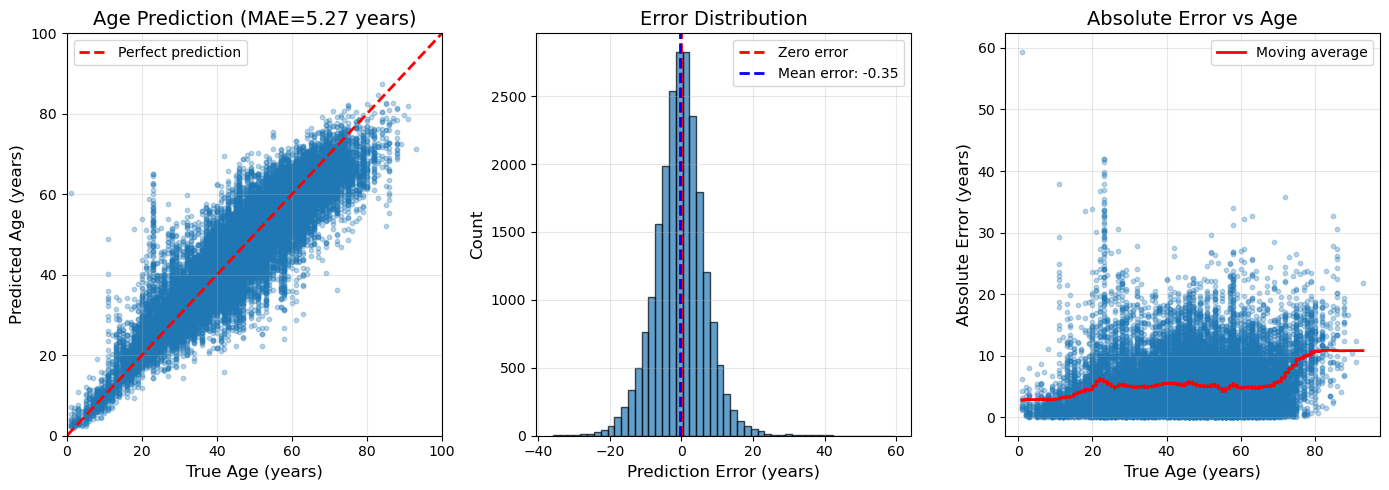


Best Model Performance:
  MAE:  5.27 years
  RMSE: 6.98 years
  Within 5 years:  58.2%
  Within 10 years: 86.3%
  Age Group Accuracy: 79.1%


In [8]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
###
# Setup
device = 'cuda' if torch.cuda.is_available() else 'cpu'
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load dataset
test_dataset = ChestXrayAgeDataset(
    root='CXR8',
    csv_file='CXR8/Data_Entry_2017_v2020.csv',
    image_list_file='dataset_splits/test.txt',
    transform=transform
)

# Create model
model = ChestXrayAgePredictor(
    dataset=test_dataset,
    feature_keys=['x'],
    label_key='age',
    mode='regression'
).to(device)

# Load weights
model.load_state_dict(torch.load('best_age_predictor.pth', map_location=device))

# Evaluate
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=4)
results = evaluate_age_prediction(model, test_loader, device)

# Print
print(f"\nBest Model Performance:")
print(f"  MAE:  {results['mae']:.2f} years")
print(f"  RMSE: {results['rmse']:.2f} years")
print(f"  Within 5 years:  {results['within_5']:.1f}%")
print(f"  Within 10 years: {results['within_10']:.1f}%")
print(f"  Age Group Accuracy: {results['group_acc']:.1%}")

In [9]:
import unittest
import tempfile
import torchvision.transforms as transforms

# from age_predictor import ChestXrayAgeDataset, ChestXrayAgePredictor, batch_to_device


# ============================================================================
# SIMPLE TEST DATA SETUP
# ============================================================================
def create_test_data():
    """Create minimal test data"""
    temp_dir = tempfile.mkdtemp()
    
    # Create CSV
    csv_path = os.path.join(temp_dir, 'test.csv')
    data = {
        'Image Index': ['test_001.png', 'test_002.png', 'test_003.png'],
        'Finding Labels': ['Pneumonia', 'Atelectasis', 'Mass'],
        'Patient Age': [25, 50, 75],
        'Patient Gender': ['M', 'F', 'M'],
        'Patient ID': ['P001', 'P002', 'P003']
    }
    pd.DataFrame(data).to_csv(csv_path, index=False)
    
    # Create image list
    list_path = os.path.join(temp_dir, 'test.txt')
    with open(list_path, 'w') as f:
        f.write('images/test_001.png\nimages/test_002.png\nimages/test_003.png\n')
    
    # Create images
    img_dir = os.path.join(temp_dir, 'images')
    os.makedirs(img_dir, exist_ok=True)
    for i in range(1, 4):
        img = Image.fromarray(np.random.randint(0, 255, (224, 224, 3), dtype=np.uint8))
        img.save(os.path.join(img_dir, f'test_{i:03d}.png'))
    
    return temp_dir, csv_path, list_path


# ============================================================================
# SIMPLE TESTS
# ============================================================================
class TestDataset(unittest.TestCase):
    """Test dataset basics"""
    
    def test_dataset_loads(self):
        """Test dataset can load data"""
        temp_dir, csv_path, list_path = create_test_data()
        
        transform = transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor()
        ])
        
        dataset = ChestXrayAgeDataset(
            root=temp_dir,
            csv_file=csv_path,
            image_list_file=list_path,
            transform=transform
        )
        
        self.assertEqual(len(dataset), 3, "Should load 3 samples")
    
    def test_dataset_item_format(self):
        """Test dataset item has correct keys and types"""
        temp_dir, csv_path, list_path = create_test_data()
        
        transform = transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor()
        ])
        
        dataset = ChestXrayAgeDataset(
            root=temp_dir,
            csv_file=csv_path,
            image_list_file=list_path,
            transform=transform
        )
        
        item = dataset[0]
        
        # Check keys exist
        self.assertIn('x', item)
        self.assertIn('age', item)
        self.assertIn('gender', item)
        
        # Check types
        self.assertIsInstance(item['x'], torch.Tensor)
        self.assertIsInstance(item['age'], torch.Tensor)


class TestModel(unittest.TestCase):
    """Test model basics"""
    
    def test_model_forward_pass(self):
        """Test model can do forward pass"""
        temp_dir, csv_path, list_path = create_test_data()
        
        transform = transforms.Compose([
            transforms.Resize(224),
            transforms.ToTensor()
        ])
        
        dataset = ChestXrayAgeDataset(
            root=temp_dir,
            csv_file=csv_path,
            image_list_file=list_path,
            transform=transform
        )
        
        model = ChestXrayAgePredictor(
            dataset=dataset,
            feature_keys=['x'],
            label_key='age',
            mode='regression'
        )
        
        # Test forward pass
        dummy_images = torch.randn(2, 3, 224, 224)
        dummy_ages = torch.tensor([30, 60])
        
        outputs = model(x=dummy_images, age=dummy_ages)
        
        # Check outputs
        self.assertIn('loss', outputs)
        self.assertIn('predicted_age', outputs)
        self.assertTrue(outputs['loss'].item() >= 0)
    
    def test_age_group_conversion(self):
        """Test age to group conversion"""
        temp_dir, csv_path, list_path = create_test_data()
        
        transform = transforms.Compose([transforms.ToTensor()])
        
        dataset = ChestXrayAgeDataset(
            root=temp_dir,
            csv_file=csv_path,
            image_list_file=list_path,
            transform=transform
        )
        
        model = ChestXrayAgePredictor(
            dataset=dataset,
            feature_keys=['x'],
            label_key='age',
            mode='regression'
        )
        
        # Test age groups
        ages = torch.tensor([10, 25, 50, 70])
        groups = model.get_age_group_label(ages)
        
        expected = torch.tensor([0, 1, 2, 3])  # Child, Young, Middle, Elderly
        torch.testing.assert_close(groups, expected)


class TestHelpers(unittest.TestCase):
    """Test helper functions"""
    
    def test_batch_to_device(self):
        """Test batch_to_device moves tensors"""
        batch = {
            'x': torch.randn(4, 3, 224, 224),
            'age': torch.tensor([25, 50, 75, 30]),
            'patient_id': ['P001', 'P002', 'P003', 'P004']
        }
        
        batch_device = batch_to_device(batch, 'cpu')
        
        # Check tensors moved
        self.assertEqual(batch_device['x'].device.type, 'cpu')
        self.assertEqual(batch_device['age'].device.type, 'cpu')
        
        # Check non-tensors unchanged
        self.assertEqual(batch_device['patient_id'], batch['patient_id'])


# ============================================================================
# RUN TESTS
# ============================================================================
if __name__ == '__main__':
    unittest.main(verbosity=2)

/home/sagemaker-user/ (unittest.loader._FailedTest./home/sagemaker-user/) ... ERROR

ERROR: /home/sagemaker-user/ (unittest.loader._FailedTest./home/sagemaker-user/)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/home/sagemaker-user/'

----------------------------------------------------------------------
Ran 1 test in 0.001s

FAILED (errors=1)


SystemExit: 1

/opt/conda/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3587: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [12]:
import unittest
import torch
import numpy as np

class TestAgePrediction(unittest.TestCase):
    """Simple unit tests for age prediction functions"""
    
    def setUp(self):
        """Setup that runs before each test"""
        pass
    
    def test_age_to_group_conversion(self):
        """Test age values map to correct groups"""
        class MockModel:
            def get_age_group_label(self, age):
                age_group = torch.zeros_like(age, dtype=torch.long)
                age_group[age < 18] = 0
                age_group[(age >= 18) & (age < 40)] = 1
                age_group[(age >= 40) & (age < 65)] = 2
                age_group[age >= 65] = 3
                return age_group
        
        model = MockModel()
        ages = torch.tensor([5, 17, 18, 39, 40, 64, 65, 90])
        groups = model.get_age_group_label(ages)
        expected = torch.tensor([0, 0, 1, 1, 2, 2, 3, 3])
        
        self.assertTrue(torch.equal(groups, expected))
    
    def test_batch_to_device_cpu(self):
        """Test batch_to_device handles tensors and strings"""
        batch = {
            'x': torch.randn(2, 3, 224, 224),
            'age': torch.tensor([30, 60]),
            'patient_id': ['P001', 'P002']
        }
        
        def batch_to_device(batch, device):
            return {k: v.to(device) if torch.is_tensor(v) else v 
                   for k, v in batch.items()}
        
        batch_device = batch_to_device(batch, 'cpu')
        
        self.assertEqual(batch_device['x'].device.type, 'cpu')
        self.assertEqual(batch_device['age'].device.type, 'cpu')
        self.assertEqual(batch_device['patient_id'], ['P001', 'P002'])
    
    def test_mae_calculation(self):
        """Test MAE calculation is correct"""
        predictions = np.array([25, 50, 75])
        true_ages = np.array([30, 45, 80])
        mae = np.abs(predictions - true_ages).mean()
        self.assertAlmostEqual(mae, 5.0)
    
    def test_rmse_calculation(self):
        """Test RMSE calculation is correct"""
        predictions = np.array([25, 50, 75])
        true_ages = np.array([30, 45, 80])
        rmse = np.sqrt(((predictions - true_ages) ** 2).mean())
        self.assertAlmostEqual(rmse, 5.0)
    
    def test_within_n_years_accuracy(self):
        """Test 'within N years' accuracy calculation"""
        predictions = np.array([25, 50, 75, 30])
        true_ages = np.array([30, 45, 80, 35])
        
        within_5 = (np.abs(predictions - true_ages) <= 5).mean() * 100
        self.assertEqual(within_5, 100.0)
        
        within_4 = (np.abs(predictions - true_ages) <= 4).mean() * 100
        self.assertEqual(within_4, 0.0)
    
    def test_model_output_shape(self):
        """Test model outputs have correct shapes"""
        batch_size = 4
        mock_outputs = {
            'predicted_age': torch.randn(batch_size),
            'predicted_group': torch.randint(0, 4, (batch_size,)),
            'loss': torch.tensor(2.5)
        }
        
        self.assertEqual(mock_outputs['predicted_age'].shape, (batch_size,))
        self.assertEqual(mock_outputs['predicted_group'].shape, (batch_size,))
        self.assertEqual(mock_outputs['loss'].dim(), 0)

# Run the tests (in Jupyter)
def run_tests():
    suite = unittest.TestLoader().loadTestsFromTestCase(TestAgePrediction)
    runner = unittest.TextTestRunner(verbosity=2)
    runner.run(suite)

# Call this to run the tests
run_tests()


test_age_to_group_conversion (__main__.TestAgePrediction.test_age_to_group_conversion)
Test age values map to correct groups ... ok
test_batch_to_device_cpu (__main__.TestAgePrediction.test_batch_to_device_cpu)
Test batch_to_device handles tensors and strings ... ok
test_mae_calculation (__main__.TestAgePrediction.test_mae_calculation)
Test MAE calculation is correct ... ok
test_model_output_shape (__main__.TestAgePrediction.test_model_output_shape)
Test model outputs have correct shapes ... ok
test_rmse_calculation (__main__.TestAgePrediction.test_rmse_calculation)
Test RMSE calculation is correct ... ok
test_within_n_years_accuracy (__main__.TestAgePrediction.test_within_n_years_accuracy)
Test 'within N years' accuracy calculation ... ok

----------------------------------------------------------------------
Ran 6 tests in 0.011s

OK
